# Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

* Apply dimensionality reduction techniques to visualize the observations.
* Apply clustering techniques to group together similar observations.


In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [1]:
import pandas as pd
import numpy as np
import scipy
import time
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets, metrics
import umap

In [2]:
wine_df = pd.read_csv('Wine.csv')

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
wine_df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
Customer_Segment          3
dtype: int64

In [5]:
X = wine_df.iloc[:,0:13].values
y = wine_df.iloc[:,13].values
## Convert class array
y = np.array([0 if x == 1 else 1 if x == 2 else 2 for x in y])

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Dimensionality reduction techniques

## PCA

In [7]:
# We just want the first two principal components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

In [8]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['Customer_Segment'] = y

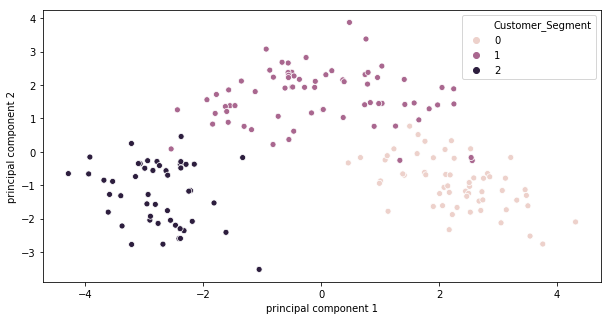

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Customer_Segment', data=principalDf)
plt.show()

## t-SNE

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.529287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.568550
[t-SNE] KL divergence after 300 iterations: 0.200855
t-SNE done! Time elapsed: 0.23178505897521973 seconds


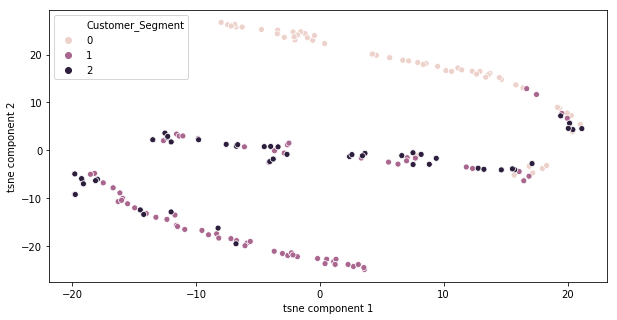

In [10]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 16.668332
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.204067
[t-SNE] KL divergence after 300 iterations: 0.155026
t-SNE done! Time elapsed: 0.24214601516723633 seconds


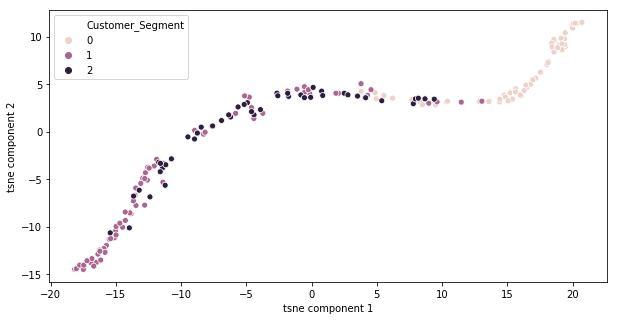

In [11]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 17.680442
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.994396
[t-SNE] KL divergence after 300 iterations: 0.121135
t-SNE done! Time elapsed: 0.30945801734924316 seconds


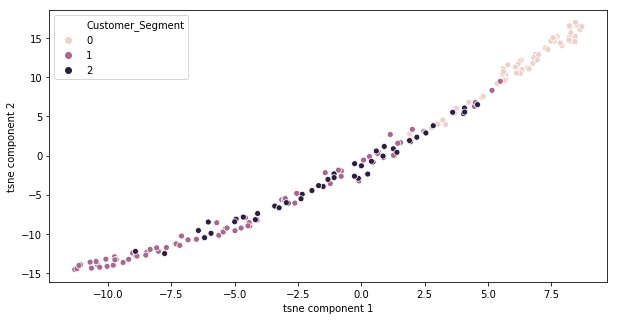

In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.134607
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.447243
[t-SNE] KL divergence after 300 iterations: 0.107040
t-SNE done! Time elapsed: 0.32776713371276855 seconds


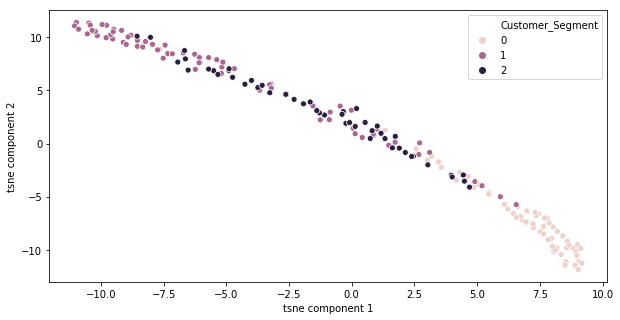

In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.365570
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.800053
[t-SNE] KL divergence after 300 iterations: 0.095282
t-SNE done! Time elapsed: 0.34340596199035645 seconds


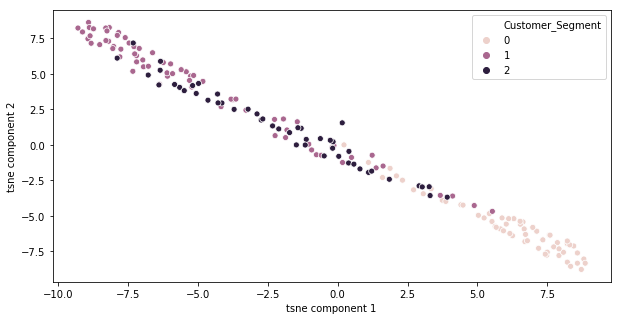

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 18.494211
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.365459
[t-SNE] KL divergence after 300 iterations: 0.066386
t-SNE done! Time elapsed: 0.32149696350097656 seconds


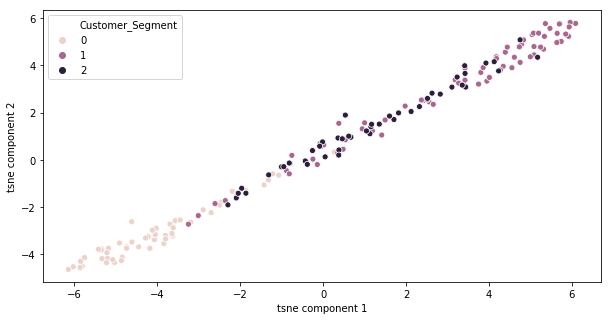

In [15]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=60, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne component 1', 'tsne component 2'])
tsneDf['Customer_Segment'] = y
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne component 1', y='tsne component 2', hue='Customer_Segment', data=tsneDf)
plt.show()

## UMAP

In [16]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=8,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP done! Time elapsed: 2.555694818496704 seconds


In [17]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=8,
                      min_dist=1,
                      metric='cosine').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP done! Time elapsed: 1.4939959049224854 seconds


# Summary of Dimentionality Reduction Methods

__Our data set is not that much complex, so PCA method works well enough. t-SNE method seems to have the better result rather than UMAP. 
t-SNE and UMAP are used when we have large and complex data set.__

# Clustering

## K-means Clustering

In [18]:
# Defining the k-means
# Playing with k values
cluster_numbers = [2, 3, 4, 5]
kmeans_clusters = []
for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

Let's visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.

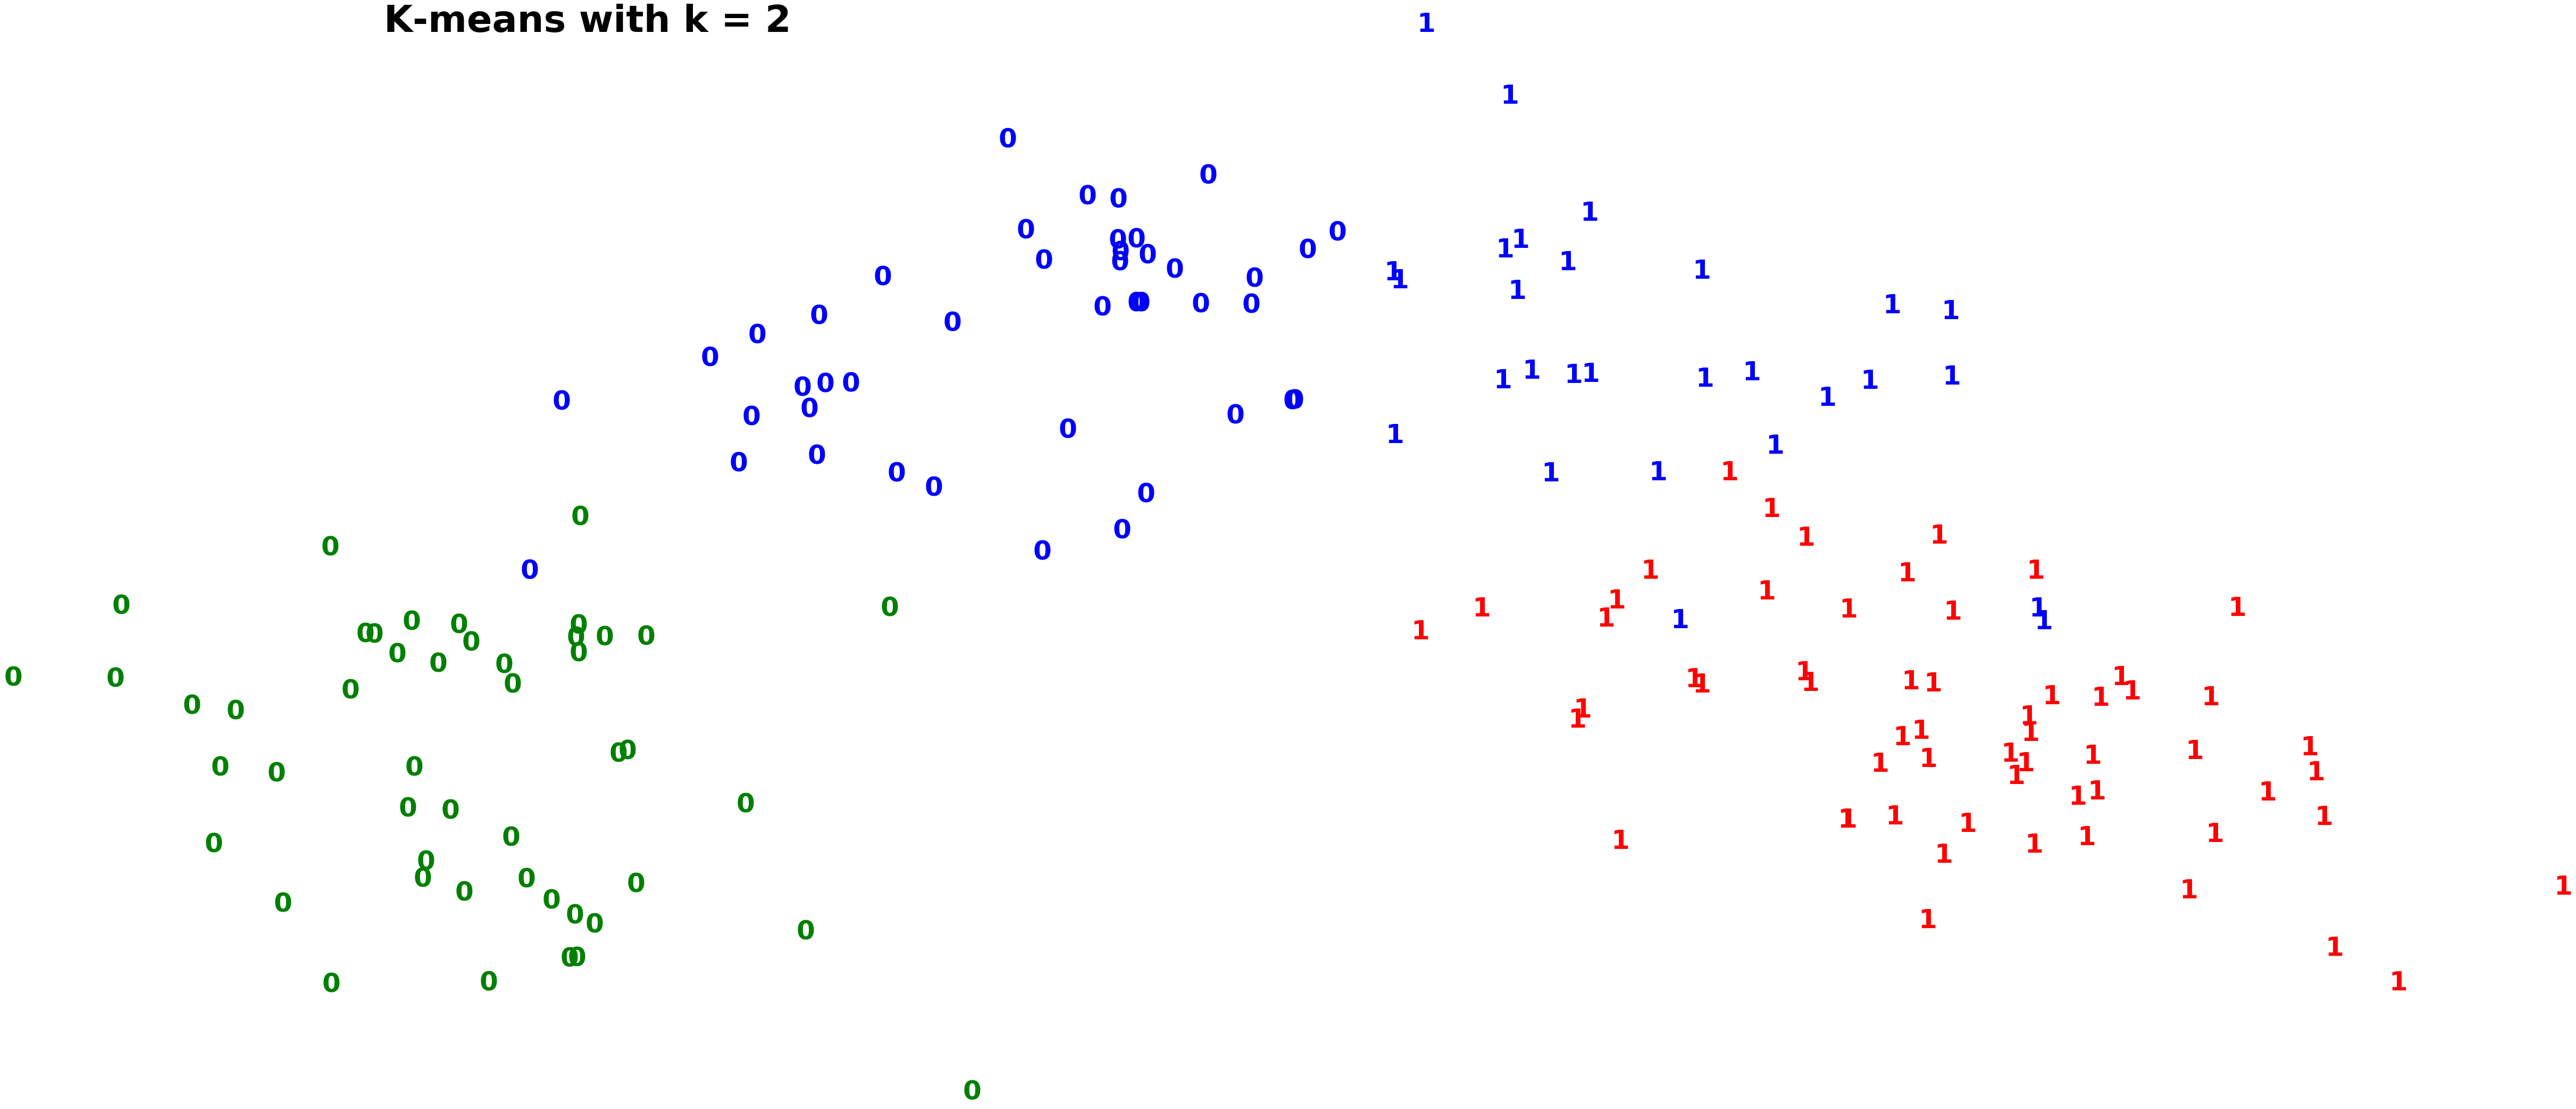

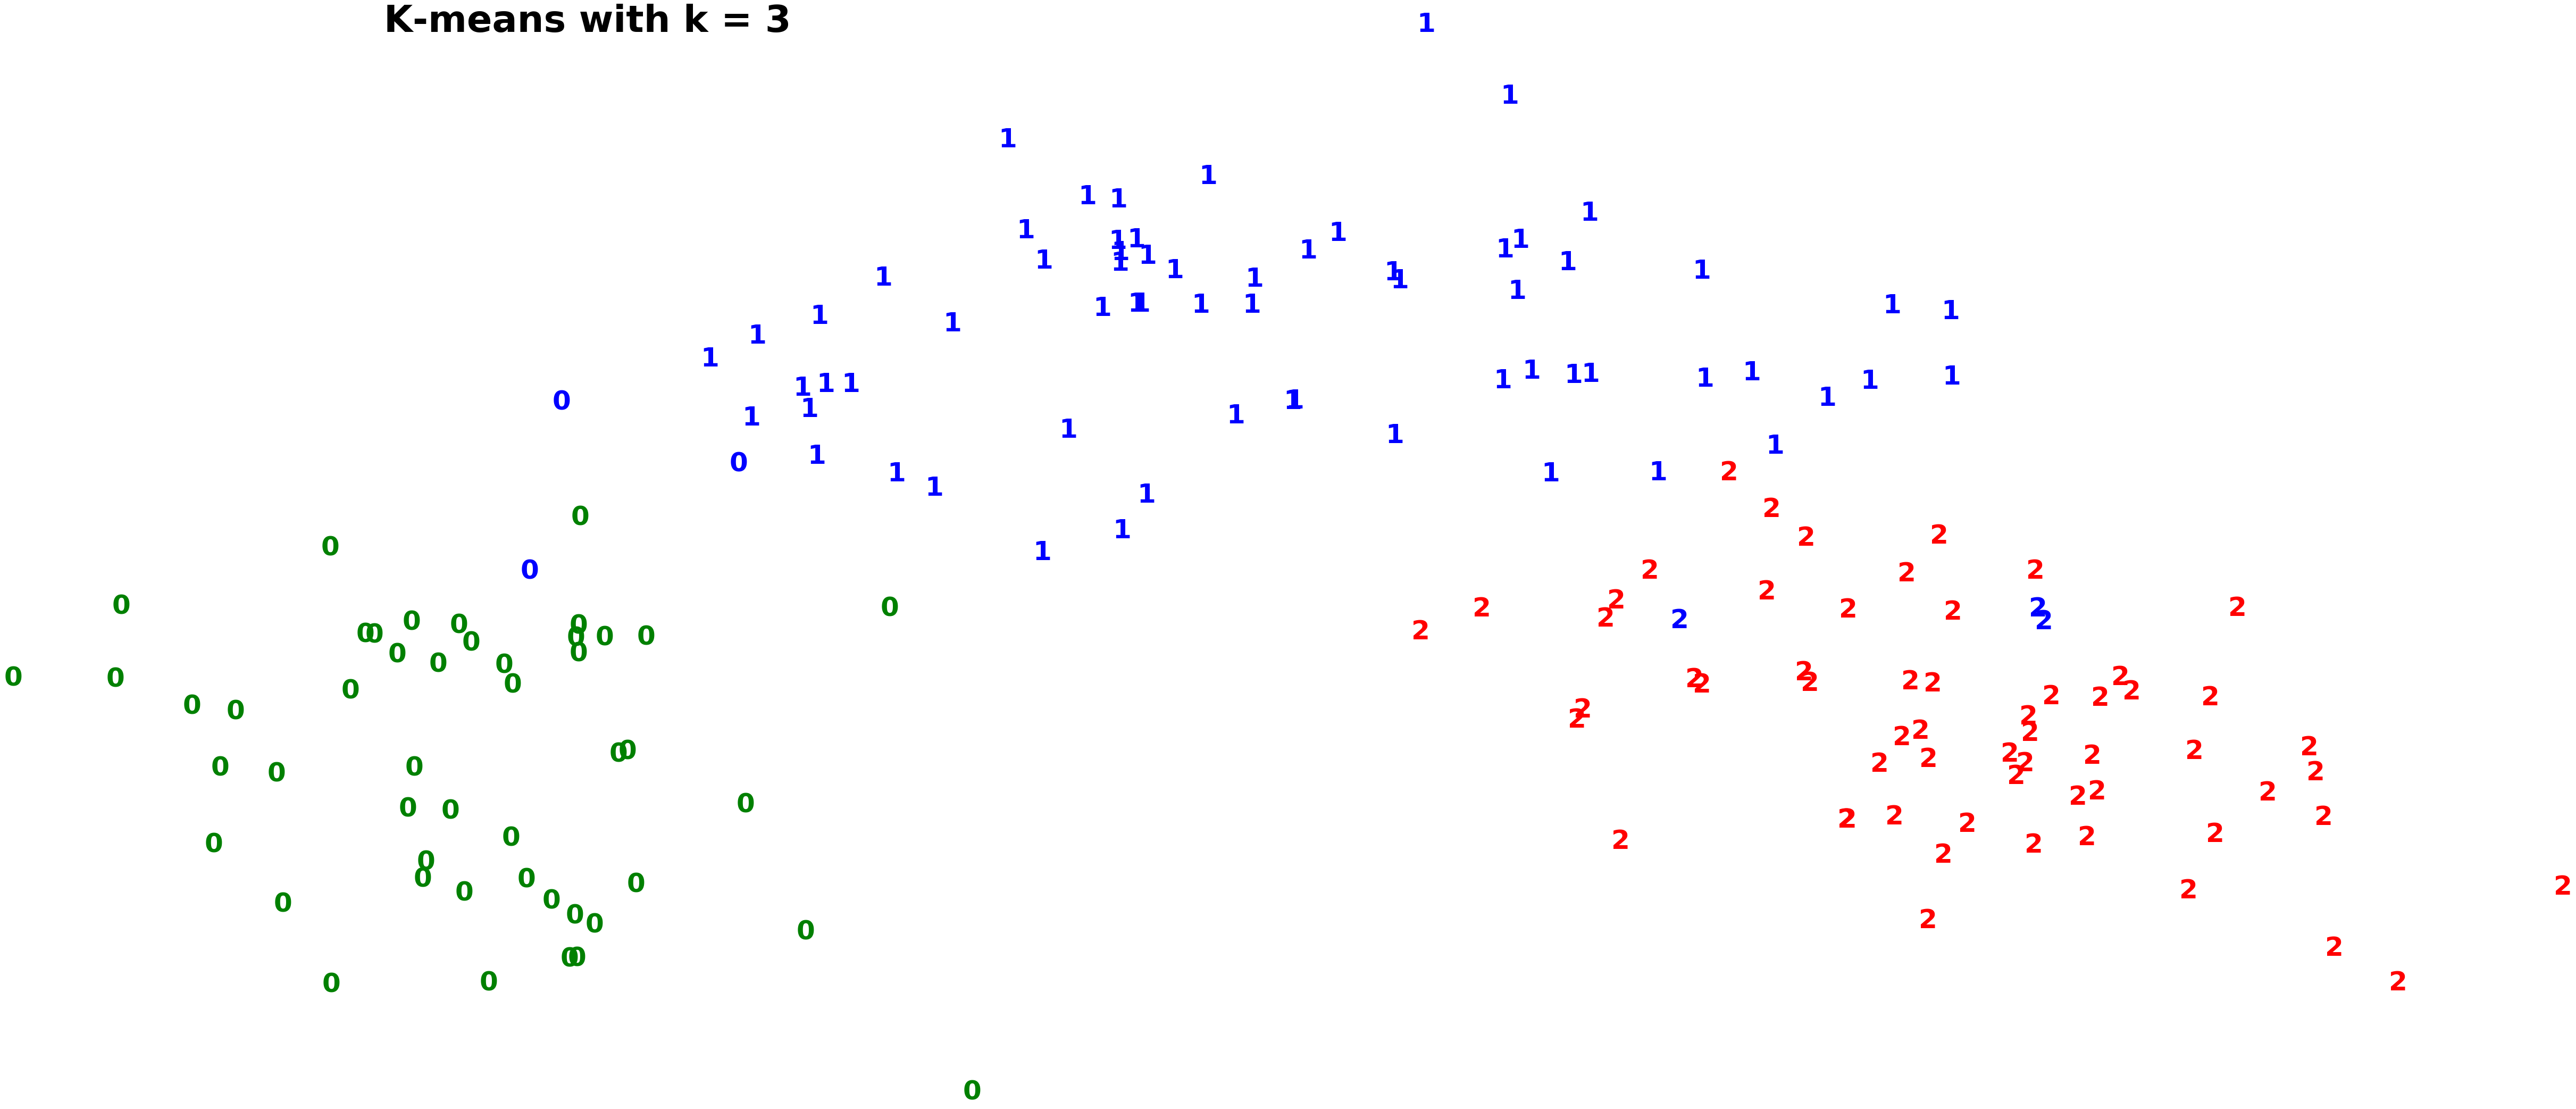

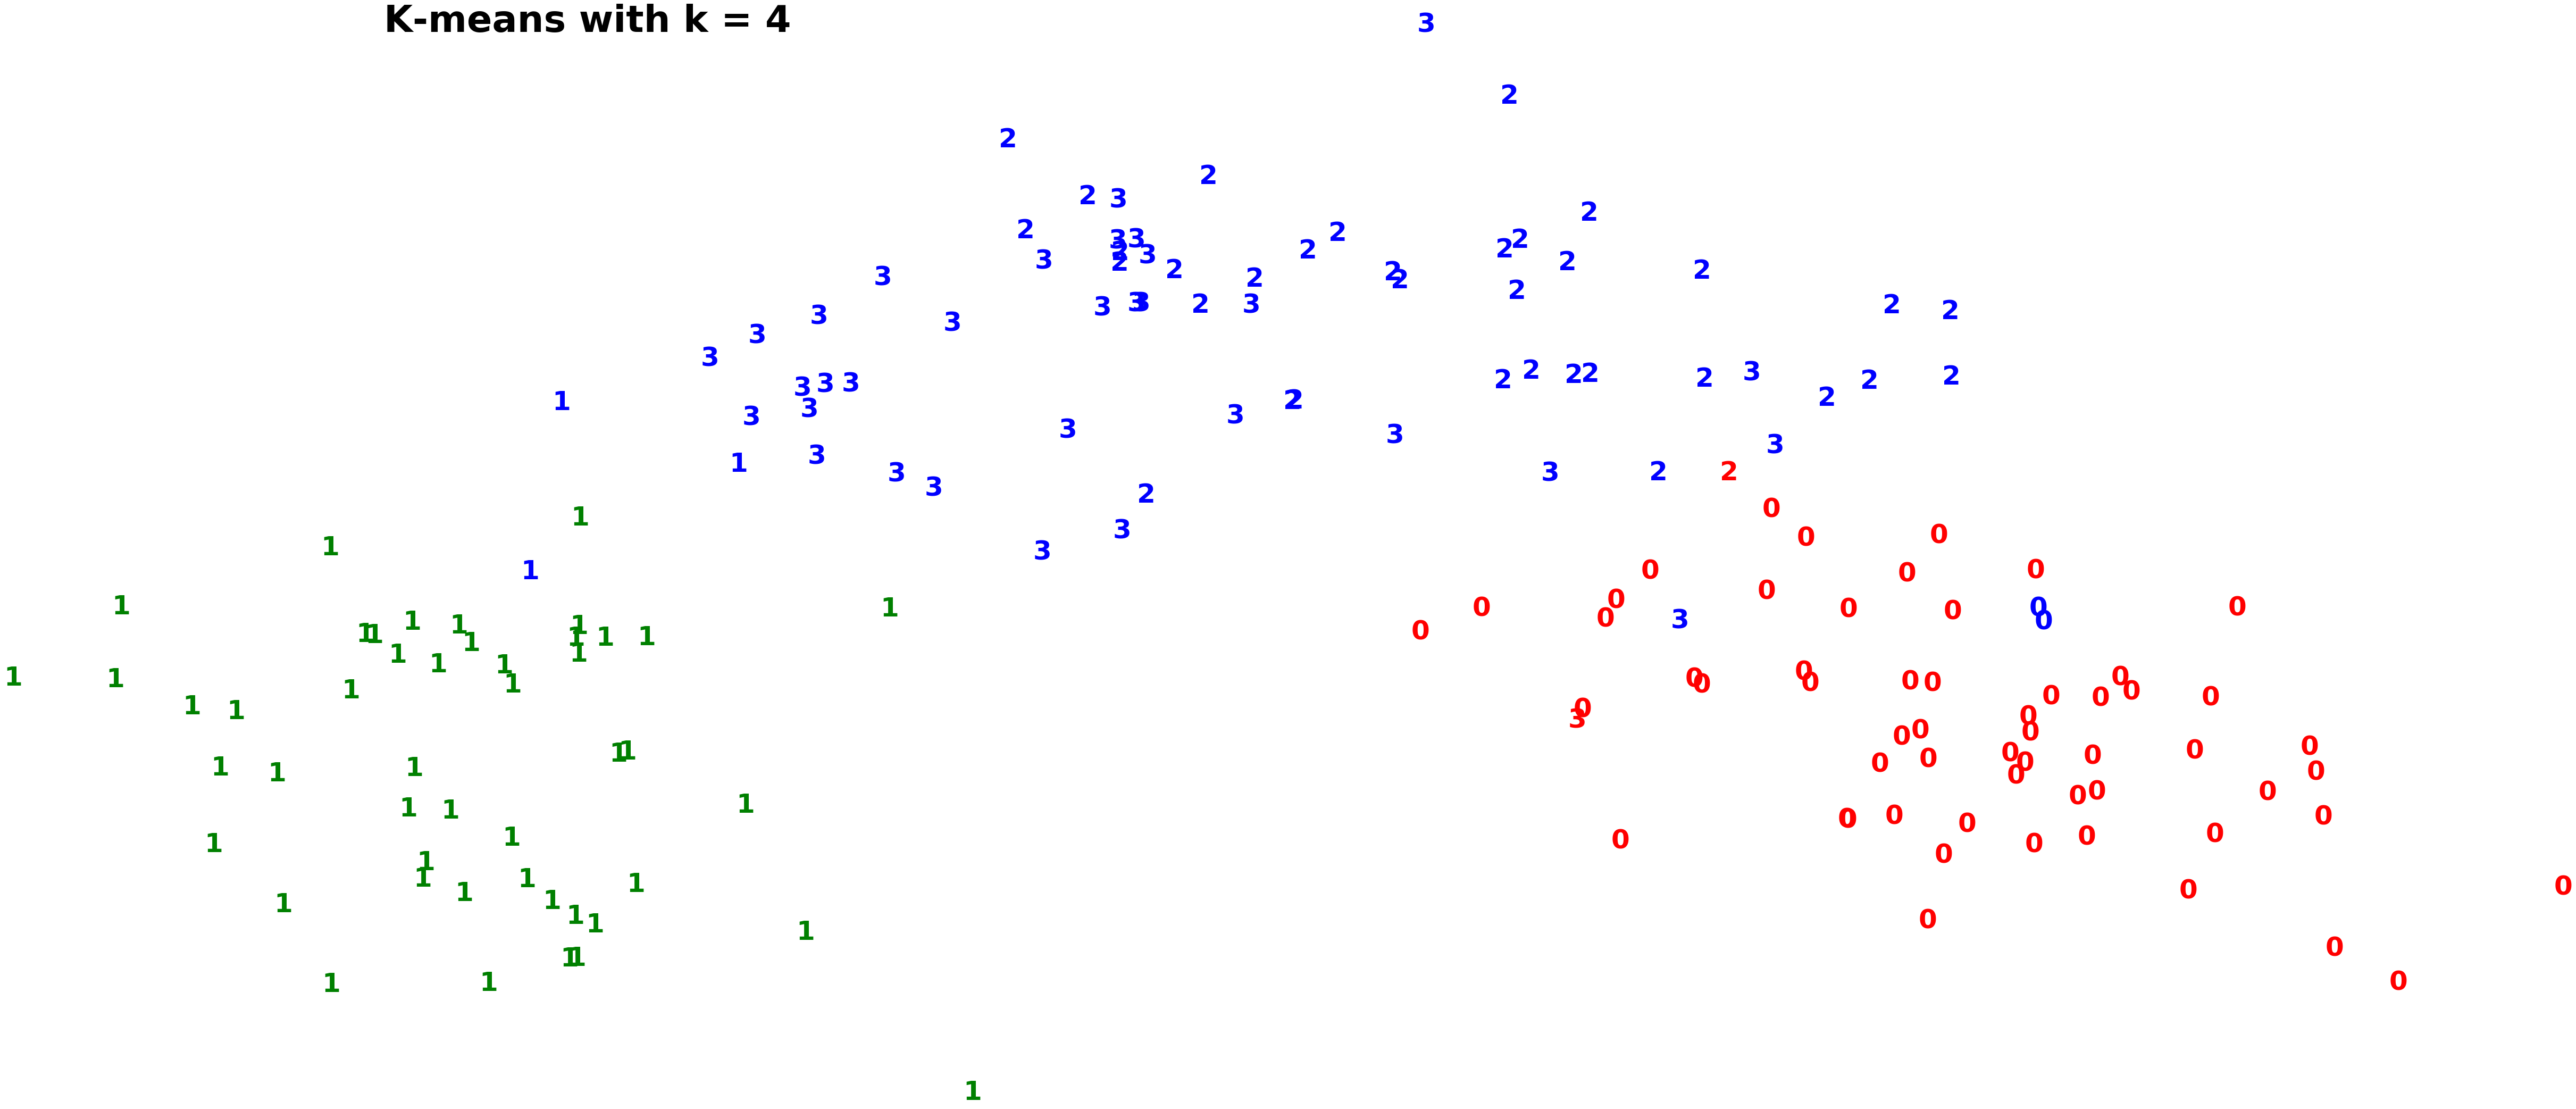

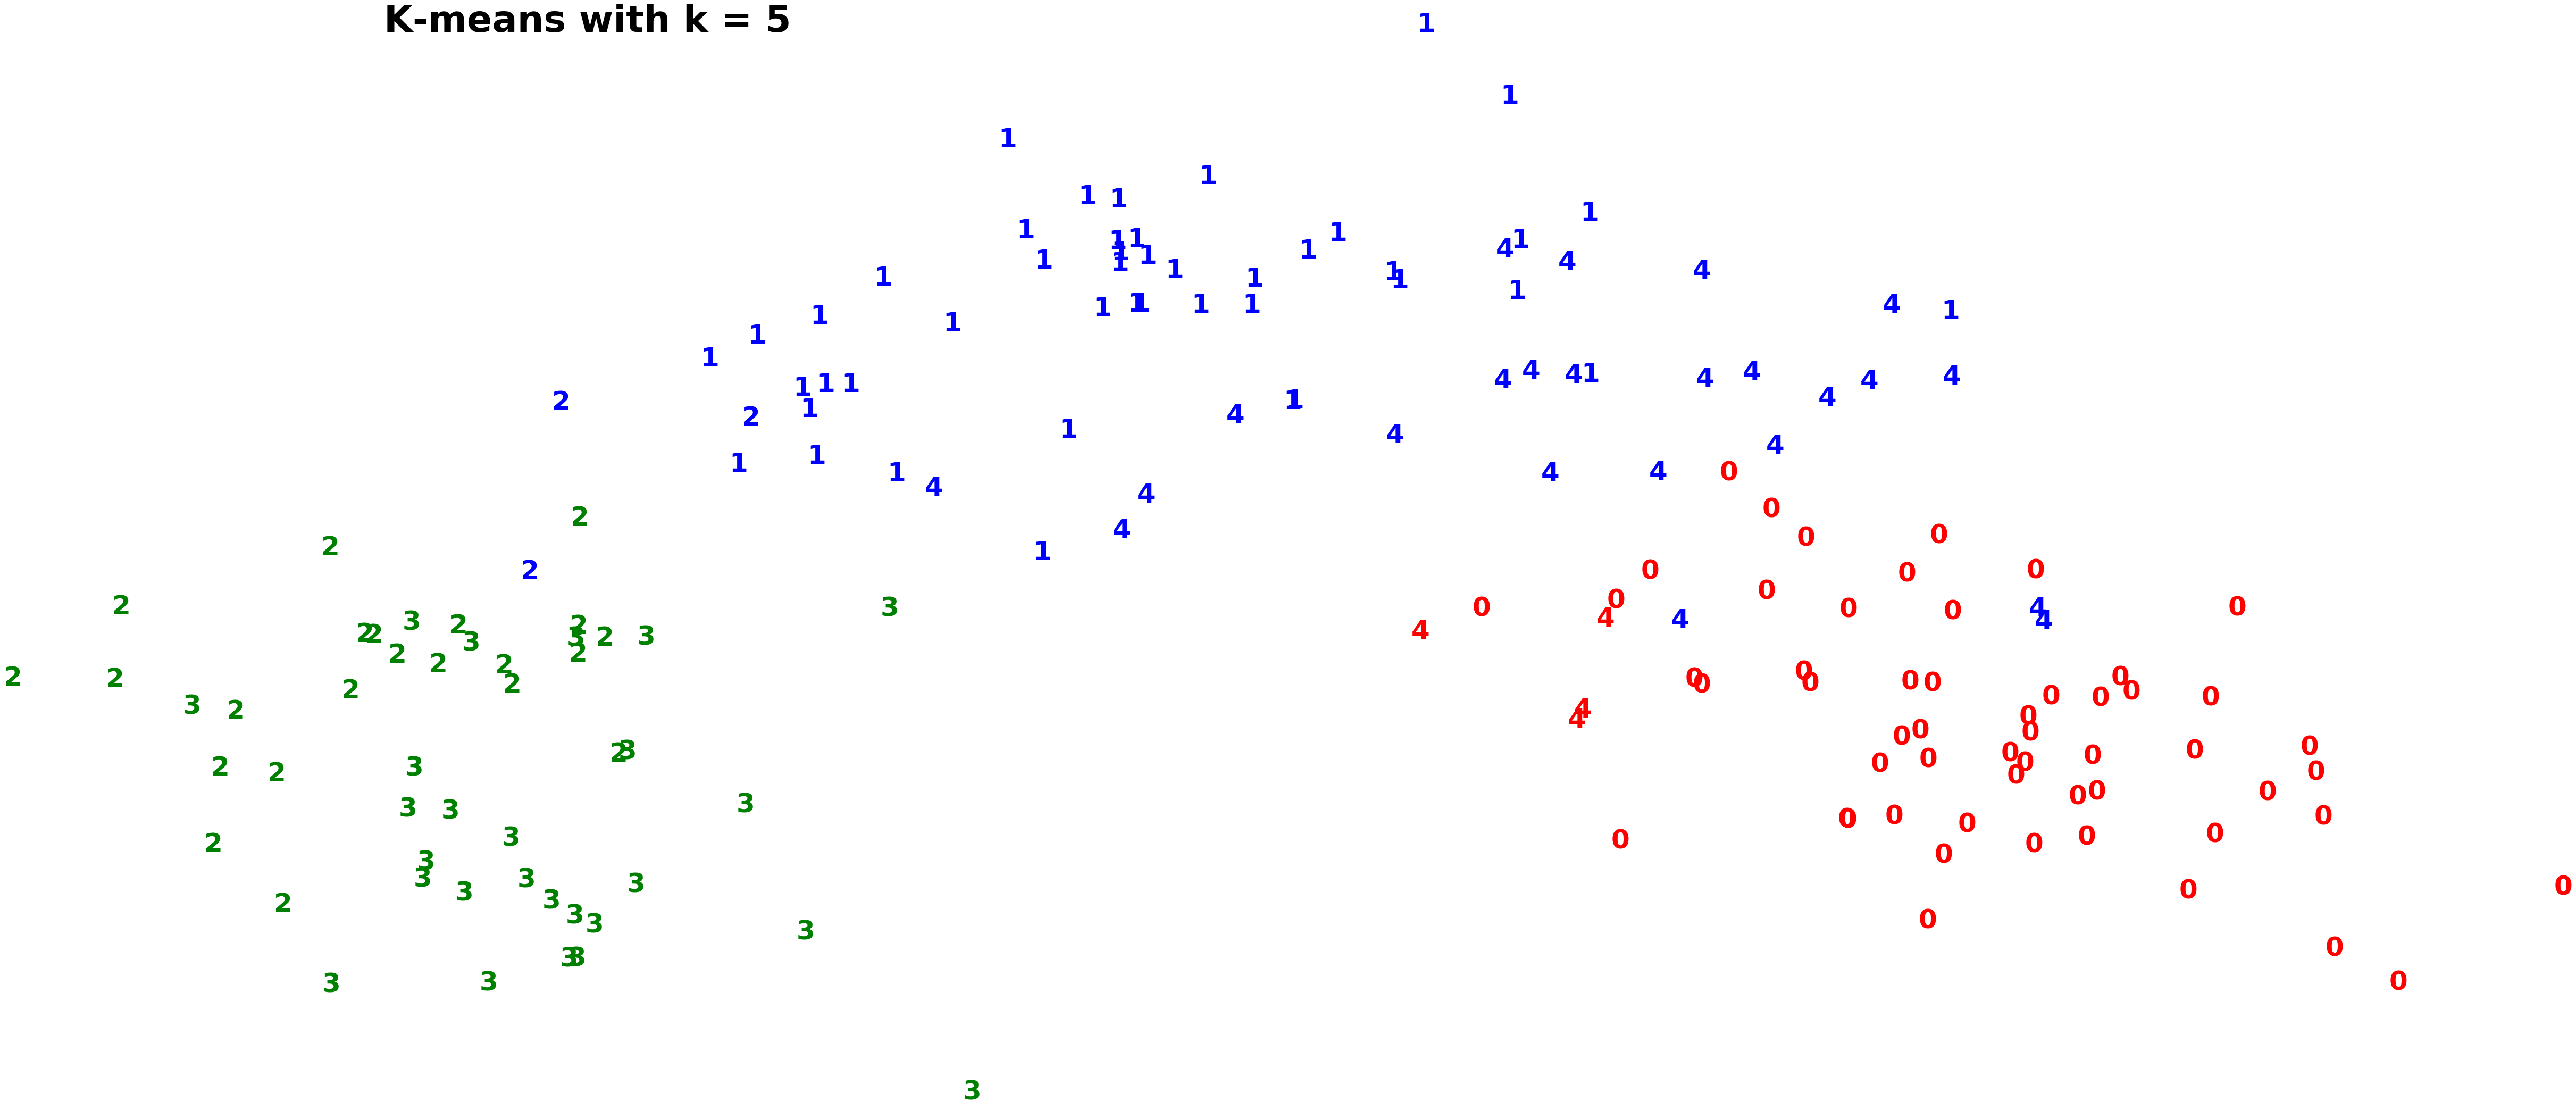

In [19]:
pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0])-3, np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 70})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50})
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

When K = 3, there is the best performance. when k > 3, it seems to be useless clustering.

According to the plot for K = 2, the blue group's data characteristics seems the middle of the other two groups.

In [20]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [21]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

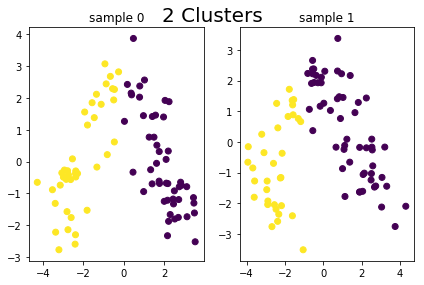

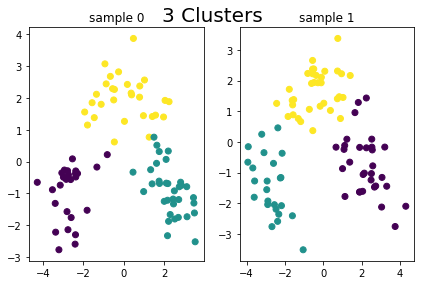

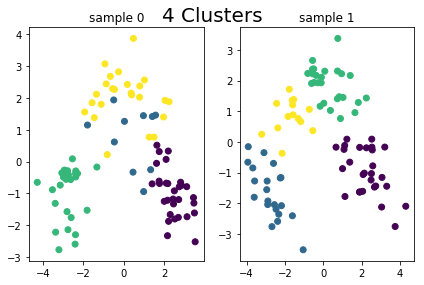

In [22]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]

        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [23]:
# Defining the agglomerative clustering
kmeans = KMeans(n_clusters=3, random_state=123)

# Fit model
clusters = kmeans.fit_predict(X_std)

#### Contingency tables
A contingency table is a tabulation of the number of observations in each class against the clusters that are assigned to them.

In [24]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,0,0,59
1,3,65,3
2,48,0,0


It seems that the cluster labeled 0 is associated with the class labeled 2, and the cluster labeled 2 is associated with the class labeled 0. So, let's rename the clusters accordingly and print out the contingency table again:

In [25]:
full_pred = np.array([0 if x == 2 else 2 if x==0 else 1 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,59,0,0
1,3,65,3
2,0,0,48


This model mistakenly assigned 3 of the observations that belong to class 0 to cluster 1 and 3 of the observations that belong to class 2 to the cluster 1. Only __6 data points seem to be assigned to the wrong clusters.__ This is not bad.

### The Rand Index

In [26]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [27]:
rand_index_score(y, full_pred)

0.9493429822890878

The RI score is quite close to 1, which is a good sign for the performance of our k-means solution. 

### Adjusted Rand Index & Silhoutte Score

In [28]:
print("Adjusted Rand Index of the Kmeans Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Kmeans Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Kmeans Clustering solution: 0.8974949815093207
The silhoutte score of the Kmeans Clustering solution: 0.2848589191898987


The score looks not bad, this means that our k-means clustering solution is closer to perfect than to random.

# Agglomerative clustering in action

## Complete linkage

In [29]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)
# Fit model
cluster = agg_cluster.fit_predict(X_std)

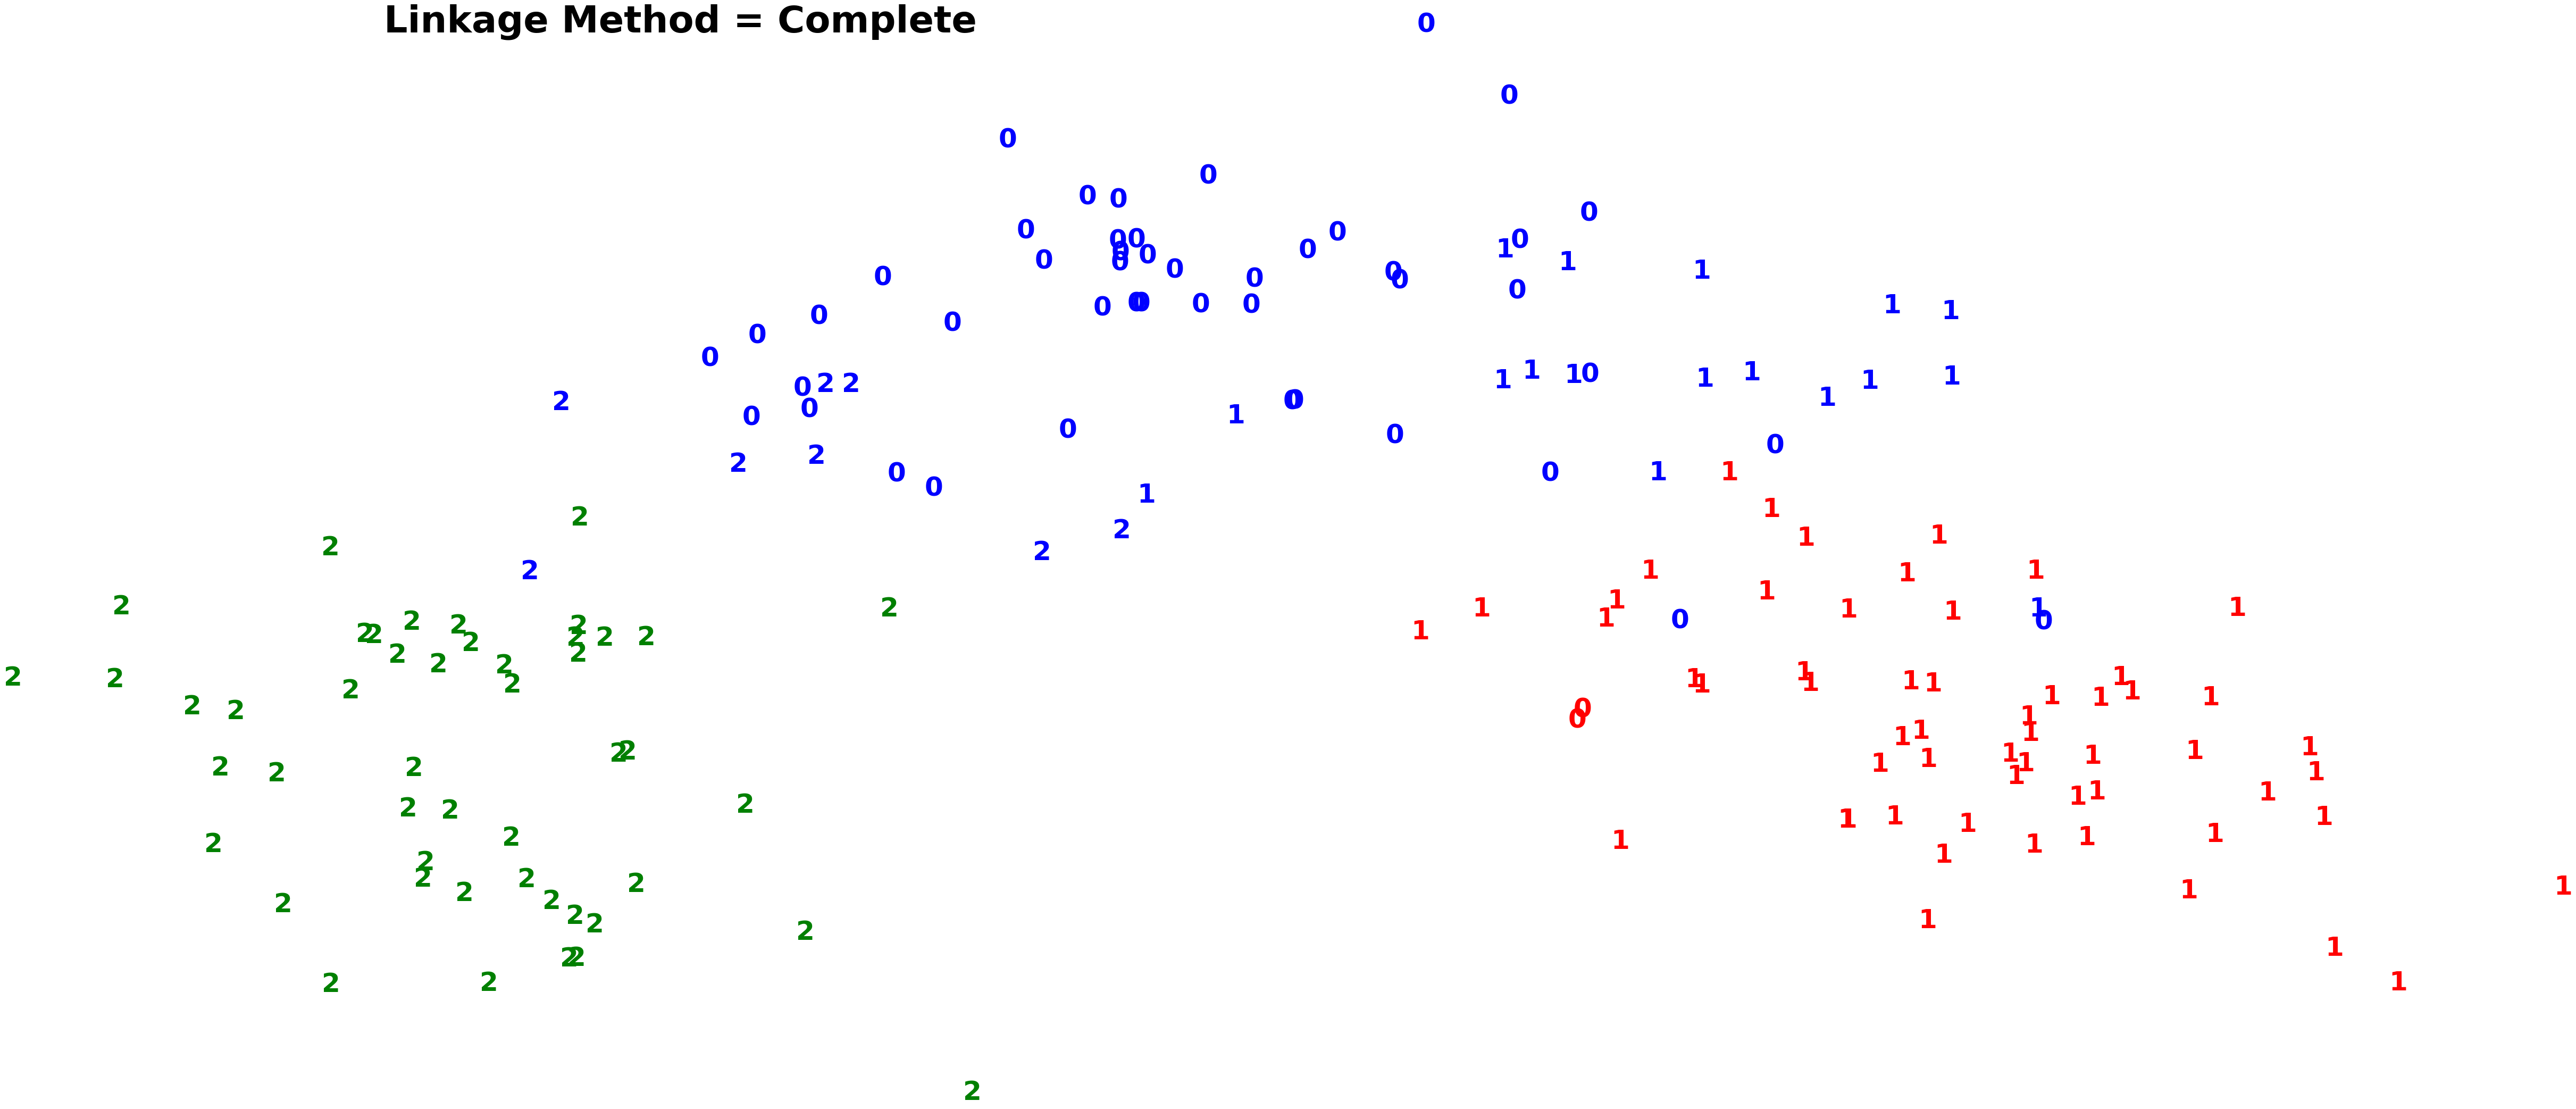

In [30]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
plt.text(np.mean(pca[:,0])-3, np.max(pca[:, 1]), "Linkage Method = Complete",
                 fontdict={'weight': 'bold', 'size': 70})

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [31]:
# Get predicted clusters.
full_pred = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,2,57,0
1,46,17,8
2,0,0,48


In [32]:
full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,57,2,0
1,17,46,8
2,0,0,48


This model mistakenly assigned 2 of the observations that belong to class 1 to cluster 0 and 17 of the observations that belong to class 0 to cluster 1 and 8 of the observations that belong to class 2 to the cluster 1. __27 data points seem to be assigned to the wrong clusters.__

In [33]:
print("Adjusted Rand Index of the Agglomerative Clustering (complete linkage) solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhoutte score of the Agglomerative Clustering (complete linkage) solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering (complete linkage) solution: 0.5972483421815707
The silhoutte score of the Agglomerative Clustering (complete linkage) solution: 0.24425920956454214


The ARI score for the agglomerative clustering approach is 0.60 and lower than the one for k-means, which was 0.90. Silhouette score also lower than the one for k-means, which was 0.28, however, these are not significantly different.

Therefore, according to ARI score, Kmeans works better than this model.

## Average linkage

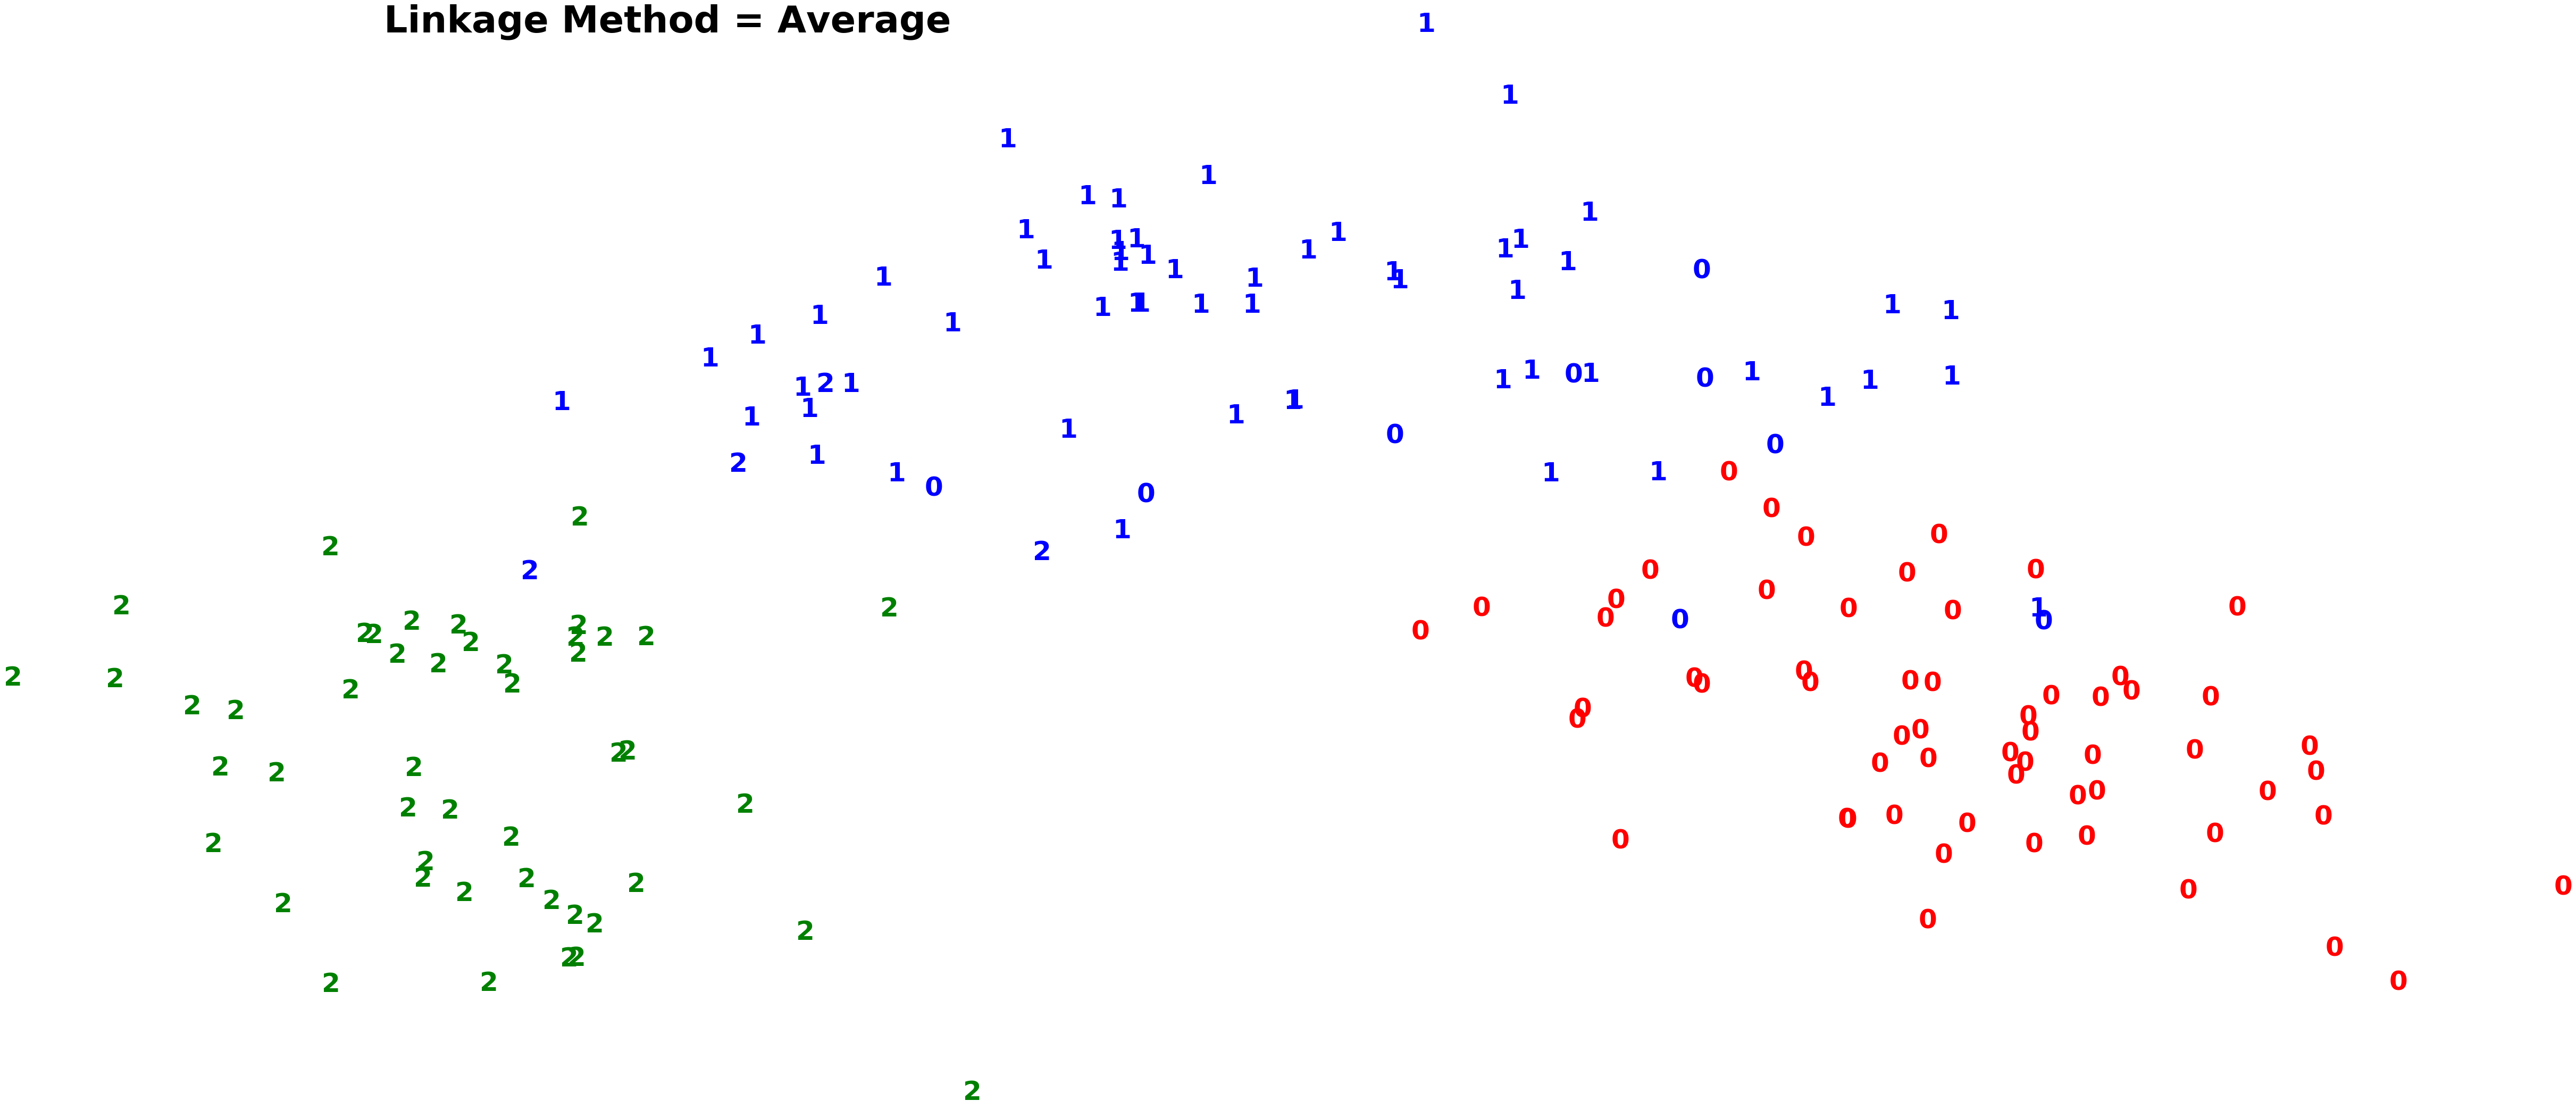

In [34]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3)
# Fit model
cluster = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
plt.text(np.mean(pca[:,0])-3, np.max(pca[:, 1]), "Linkage Method = Average",
                 fontdict={'weight': 'bold', 'size': 70})

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [35]:
# Get predicted clusters.
full_pred = AgglomerativeClustering(linkage='average', 
                                      affinity='cosine',
                                      n_clusters=3).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,59,0,0
1,9,58,4
2,0,0,48


This model mistakenly assigned 9 of the observations that belong to class 0 to cluster 1 and 4 of the observations that belong to class 2 to cluster. __13 data points seem to be assigned to the wrong clusters.__

In [36]:
print("Adjusted Rand Index of the Agglomerative Clustering (average linkage) solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhoutte score of the Agglomerative Clustering (average linkage) solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering (average linkage) solution: 0.7847063550518786
The silhoutte score of the Agglomerative Clustering (average linkage) solution: 0.26445785904779395


The ARI score for the agglomerative clustering approach is 0.78 and lower than the one for k-means, which was 0.90. However, it seems better than agglomerative clustering method with complete linkage.
Silhouette score also lower than the one for k-means, which was 0.28, however, these are not significantly different.

Therefore, according to ARI score, Kmeans works better than this model, and this is better performance than when we use complete linkage in the agglomerative clustering.

## Ward linkage

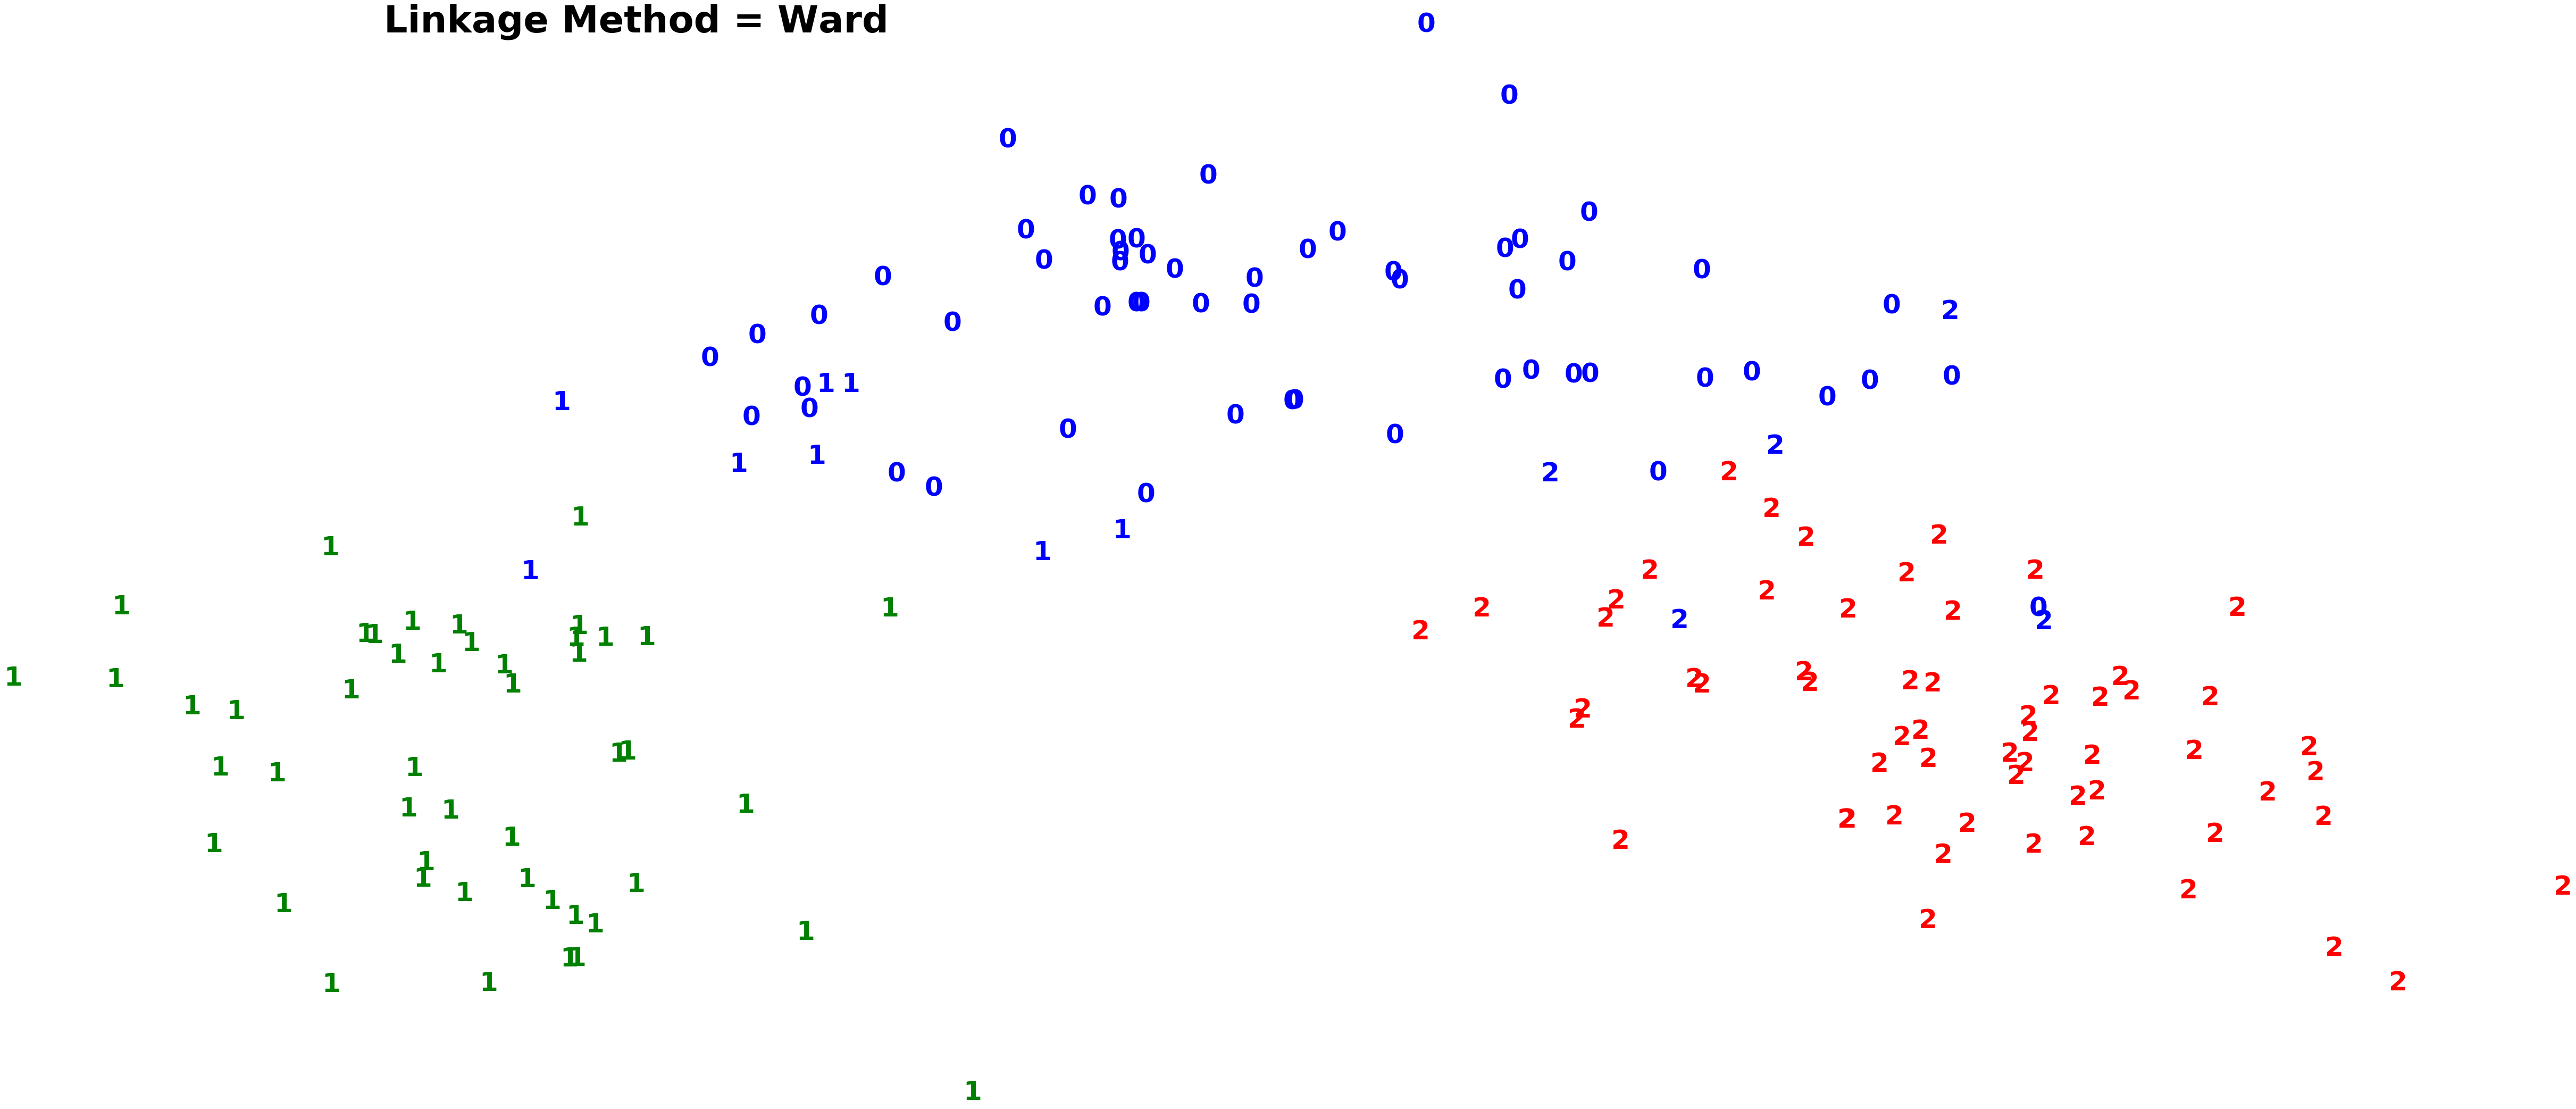

In [37]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)
# Fit model
cluster = agg_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
plt.text(np.mean(pca[:,0])-3, np.max(pca[:, 1]), "Linkage Method = Ward",
                 fontdict={'weight': 'bold', 'size': 70})

for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50})
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [38]:
# Get predicted clusters.
full_pred = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,0,0,59
1,58,8,5
2,0,48,0


In [39]:
full_pred = np.array([0 if x == 2 else 1 if x == 0 else 2 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0,0,1,2
row_0,,,
0,59,0,0
1,5,58,8
2,0,0,48


This model mistakenly assigned 5 of the observations that belong to class 0 to cluster 1 and 8 of the observations that belong to class 2 to cluster. __13 data points seem to be assigned to the wrong clusters.__

In [40]:
print("Adjusted Rand Index of the Agglomerative Clustering (ward linkage) solution: {}"
      .format(metrics.adjusted_rand_score(y, cluster)))
print("The silhoutte score of the Agglomerative Clustering (ward linkage) solution: {}"
      .format(metrics.silhouette_score(X_std, cluster, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering (ward linkage) solution: 0.7899332213582837
The silhoutte score of the Agglomerative Clustering (ward linkage) solution: 0.27744398269522647


The ARI score for the agglomerative clustering approach is 0.78 and lower than the one for k-means, which was 0.90. However, it seems better than agglomerative clustering method with complete linkage and similar with agerage linkage method. 

Silhouette score also slightly lower than the one for k-means, which was 0.28, however, these are not significantly different.

Therefore, according to ARI score, Kmeans works better than this model, and this is better performance than when we use complete and average linkage in the agglomerative clustering.

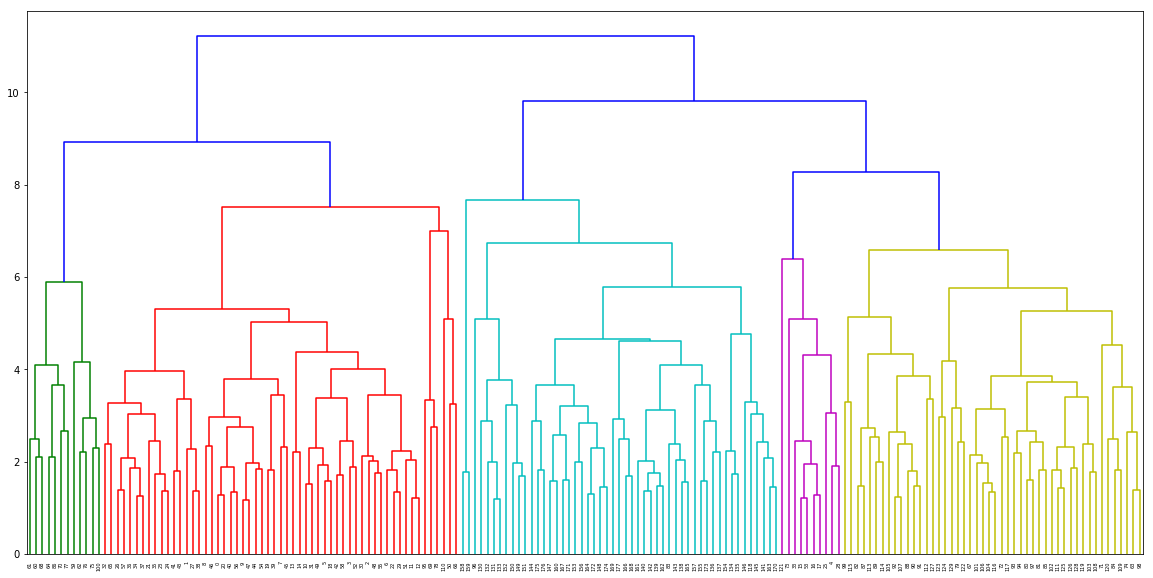

In [41]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

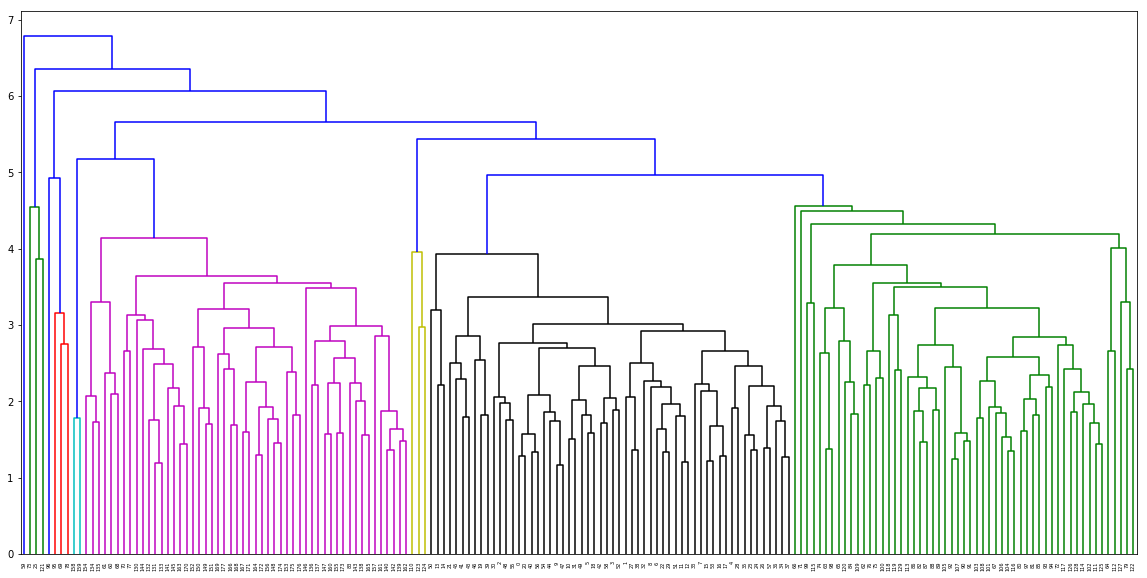

In [42]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

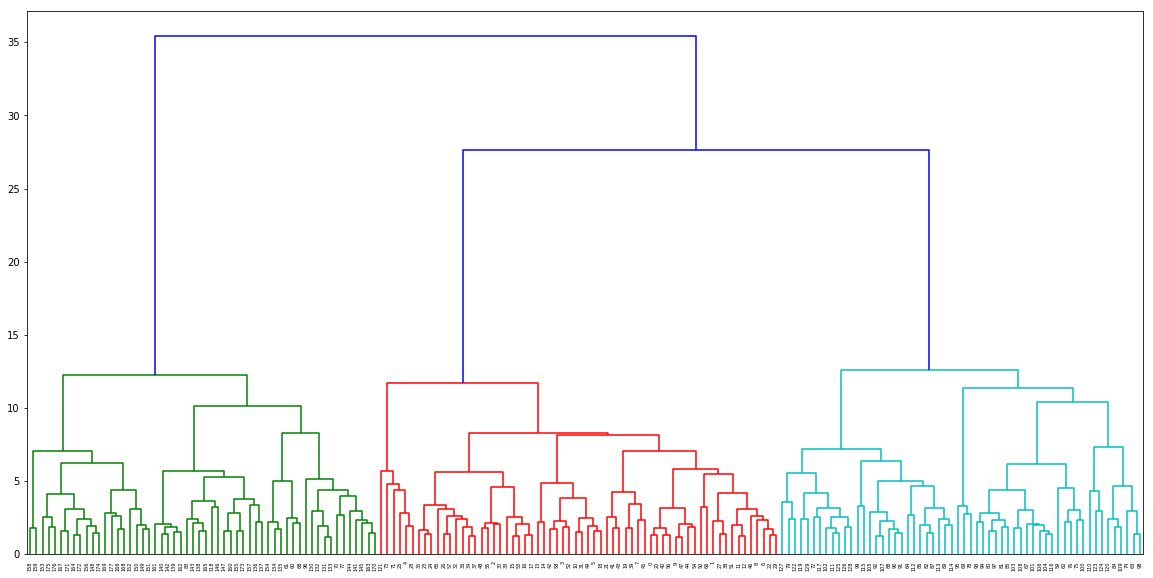

In [43]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

By investigating this dendrogram, I can choose the clustering method with __"ward"__ linkage in terms of the number of clusters that match most to I needs, if I should choose only clustering.

# DBSCAN

In [44]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 178
Number of clusters when min_samples=2 is: 1
Number of clusters when min_samples=3 is: 1
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of cluster

In [45]:
dbscan_cluster = DBSCAN(eps=2, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=2, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 65
Number of clusters when min_samples=2 is: 10
Number of clusters when min_samples=3 is: 6
Number of clusters when min_samples=4 is: 7
Number of clusters when min_samples=5 is: 6
Number of clusters when min_samples=6 is: 4
Number of clusters when min_samples=7 is: 4
Number of clusters when min_samples=8 is: 4
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 3
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1
Number of clusters when min_samples=21 is: 1
Number of clusters when min_samples=22 is: 1
Number of cluster

In [46]:
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,51):
    dbscan_cluster = DBSCAN(eps=3, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 8
Number of clusters when min_samples=2 is: 4
Number of clusters when min_samples=3 is: 3
Number of clusters when min_samples=4 is: 2
Number of clusters when min_samples=5 is: 2
Number of clusters when min_samples=6 is: 2
Number of clusters when min_samples=7 is: 2
Number of clusters when min_samples=8 is: 2
Number of clusters when min_samples=9 is: 2
Number of clusters when min_samples=10 is: 2
Number of clusters when min_samples=11 is: 2
Number of clusters when min_samples=12 is: 2
Number of clusters when min_samples=13 is: 2
Number of clusters when min_samples=14 is: 2
Number of clusters when min_samples=15 is: 2
Number of clusters when min_samples=16 is: 2
Number of clusters when min_samples=17 is: 2
Number of clusters when min_samples=18 is: 2
Number of clusters when min_samples=19 is: 2
Number of clusters when min_samples=20 is: 2
Number of clusters when min_samples=21 is: 2
Number of clusters when min_samples=22 is: 3
Number of clusters 

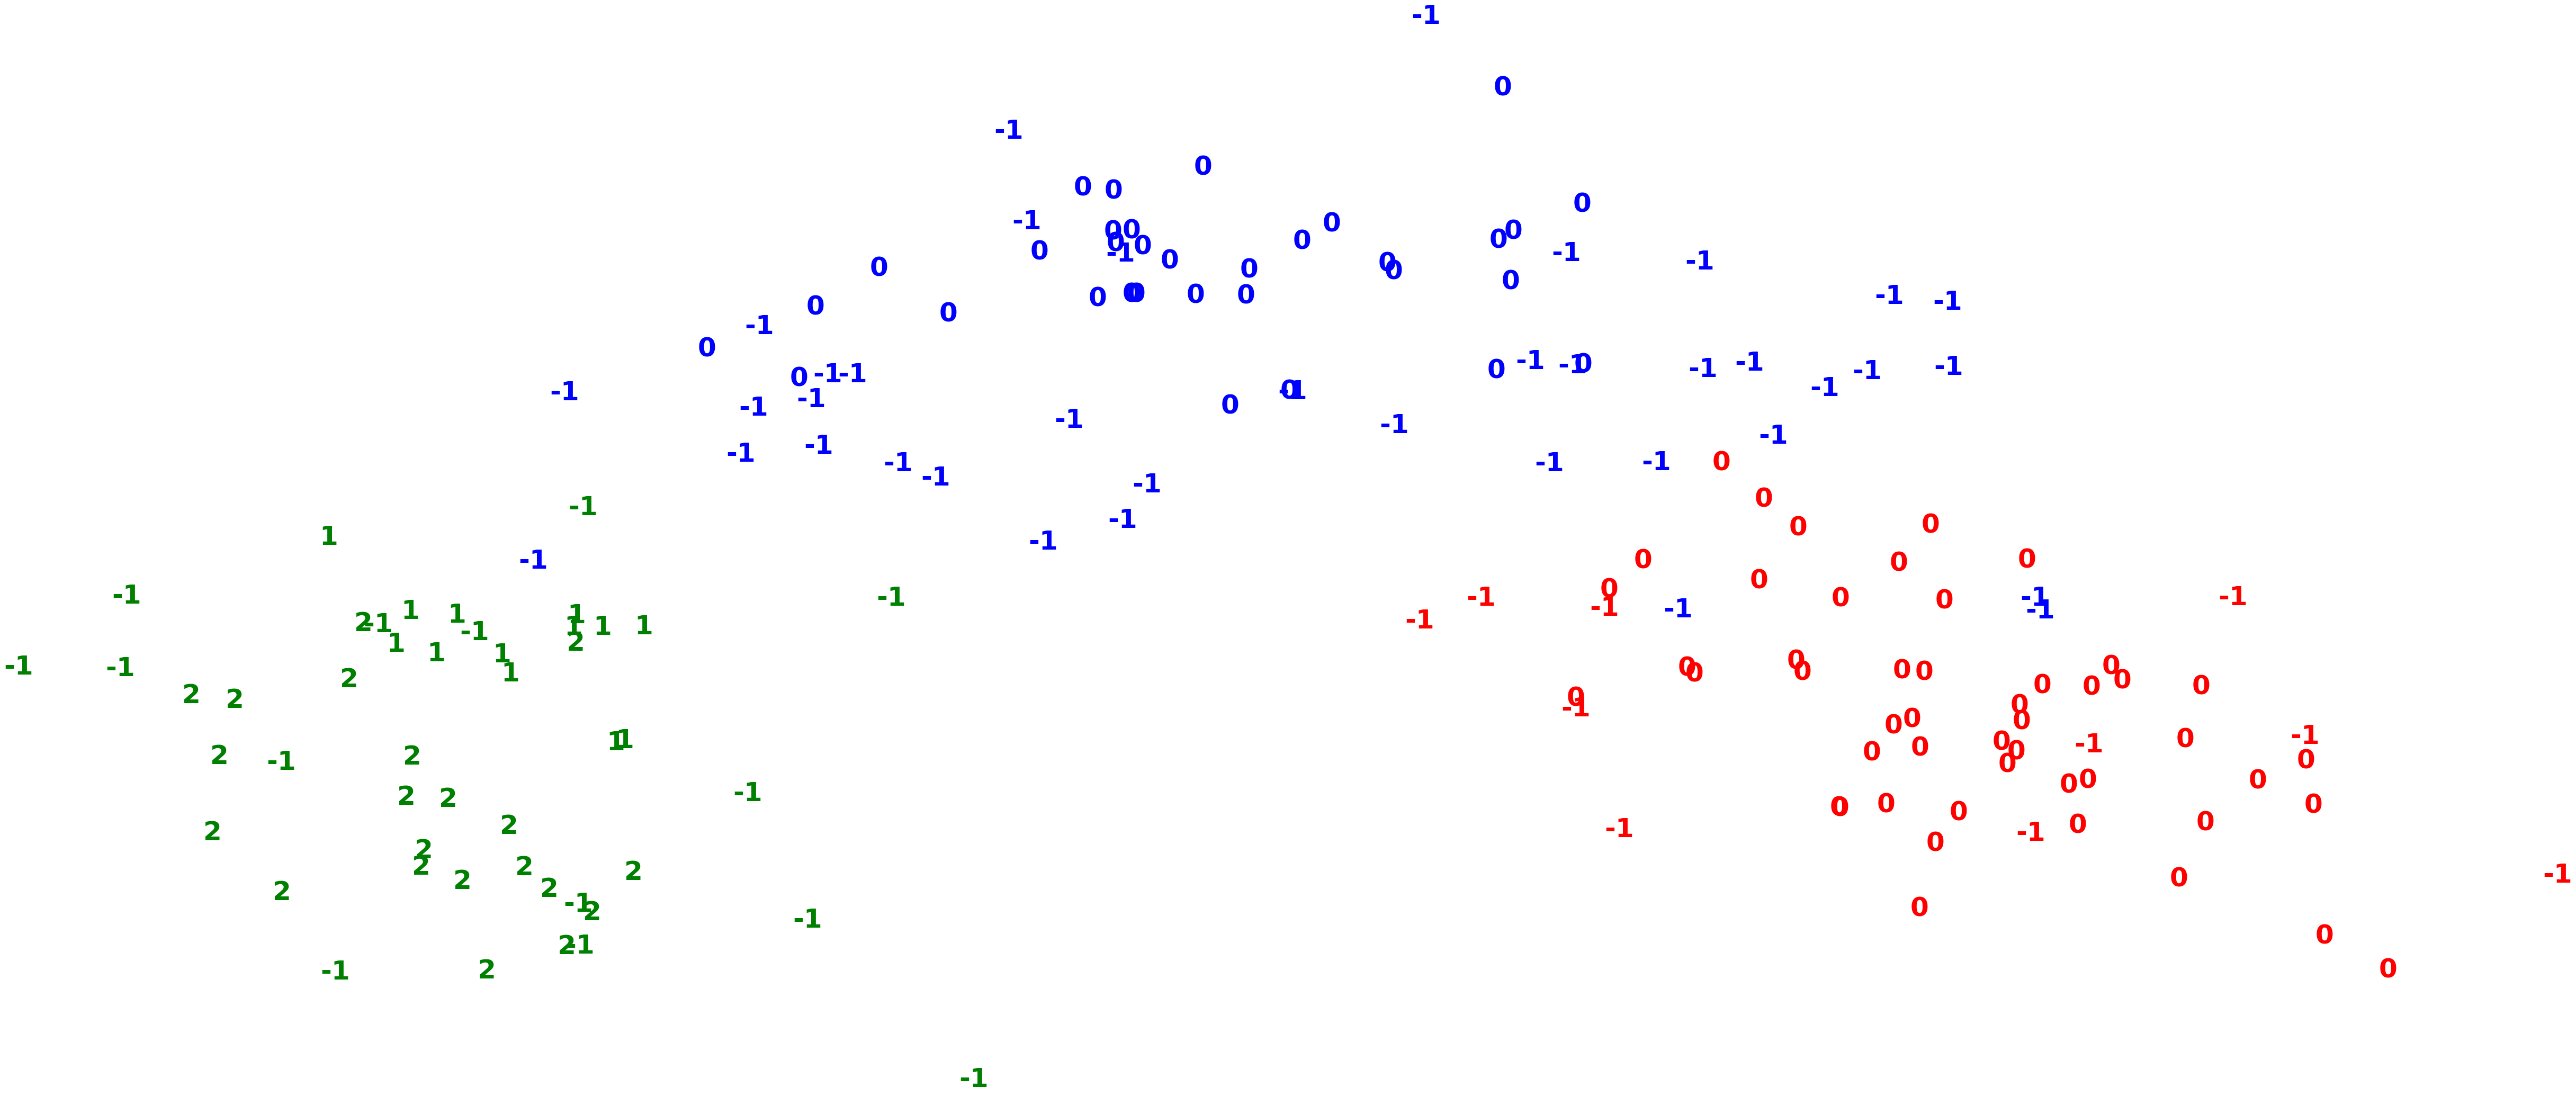

,unique,count
0,-1,62
1,0,82
2,1,13
3,2,21


In [47]:
dbscan_cluster = DBSCAN(eps=2.1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)
unique, count = np.unique(clusters, return_counts=True)
df = pd.DataFrame()
df['unique'] = unique
df['count'] = count
df
plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
df

**This is really hard to get a two cluster solution using DBSCAN. I had tried many kind of combinations of eps and  min_samples, I couldn't get any good results**

## Gaussian Mixture Models (GMM)

### covariance_type = full

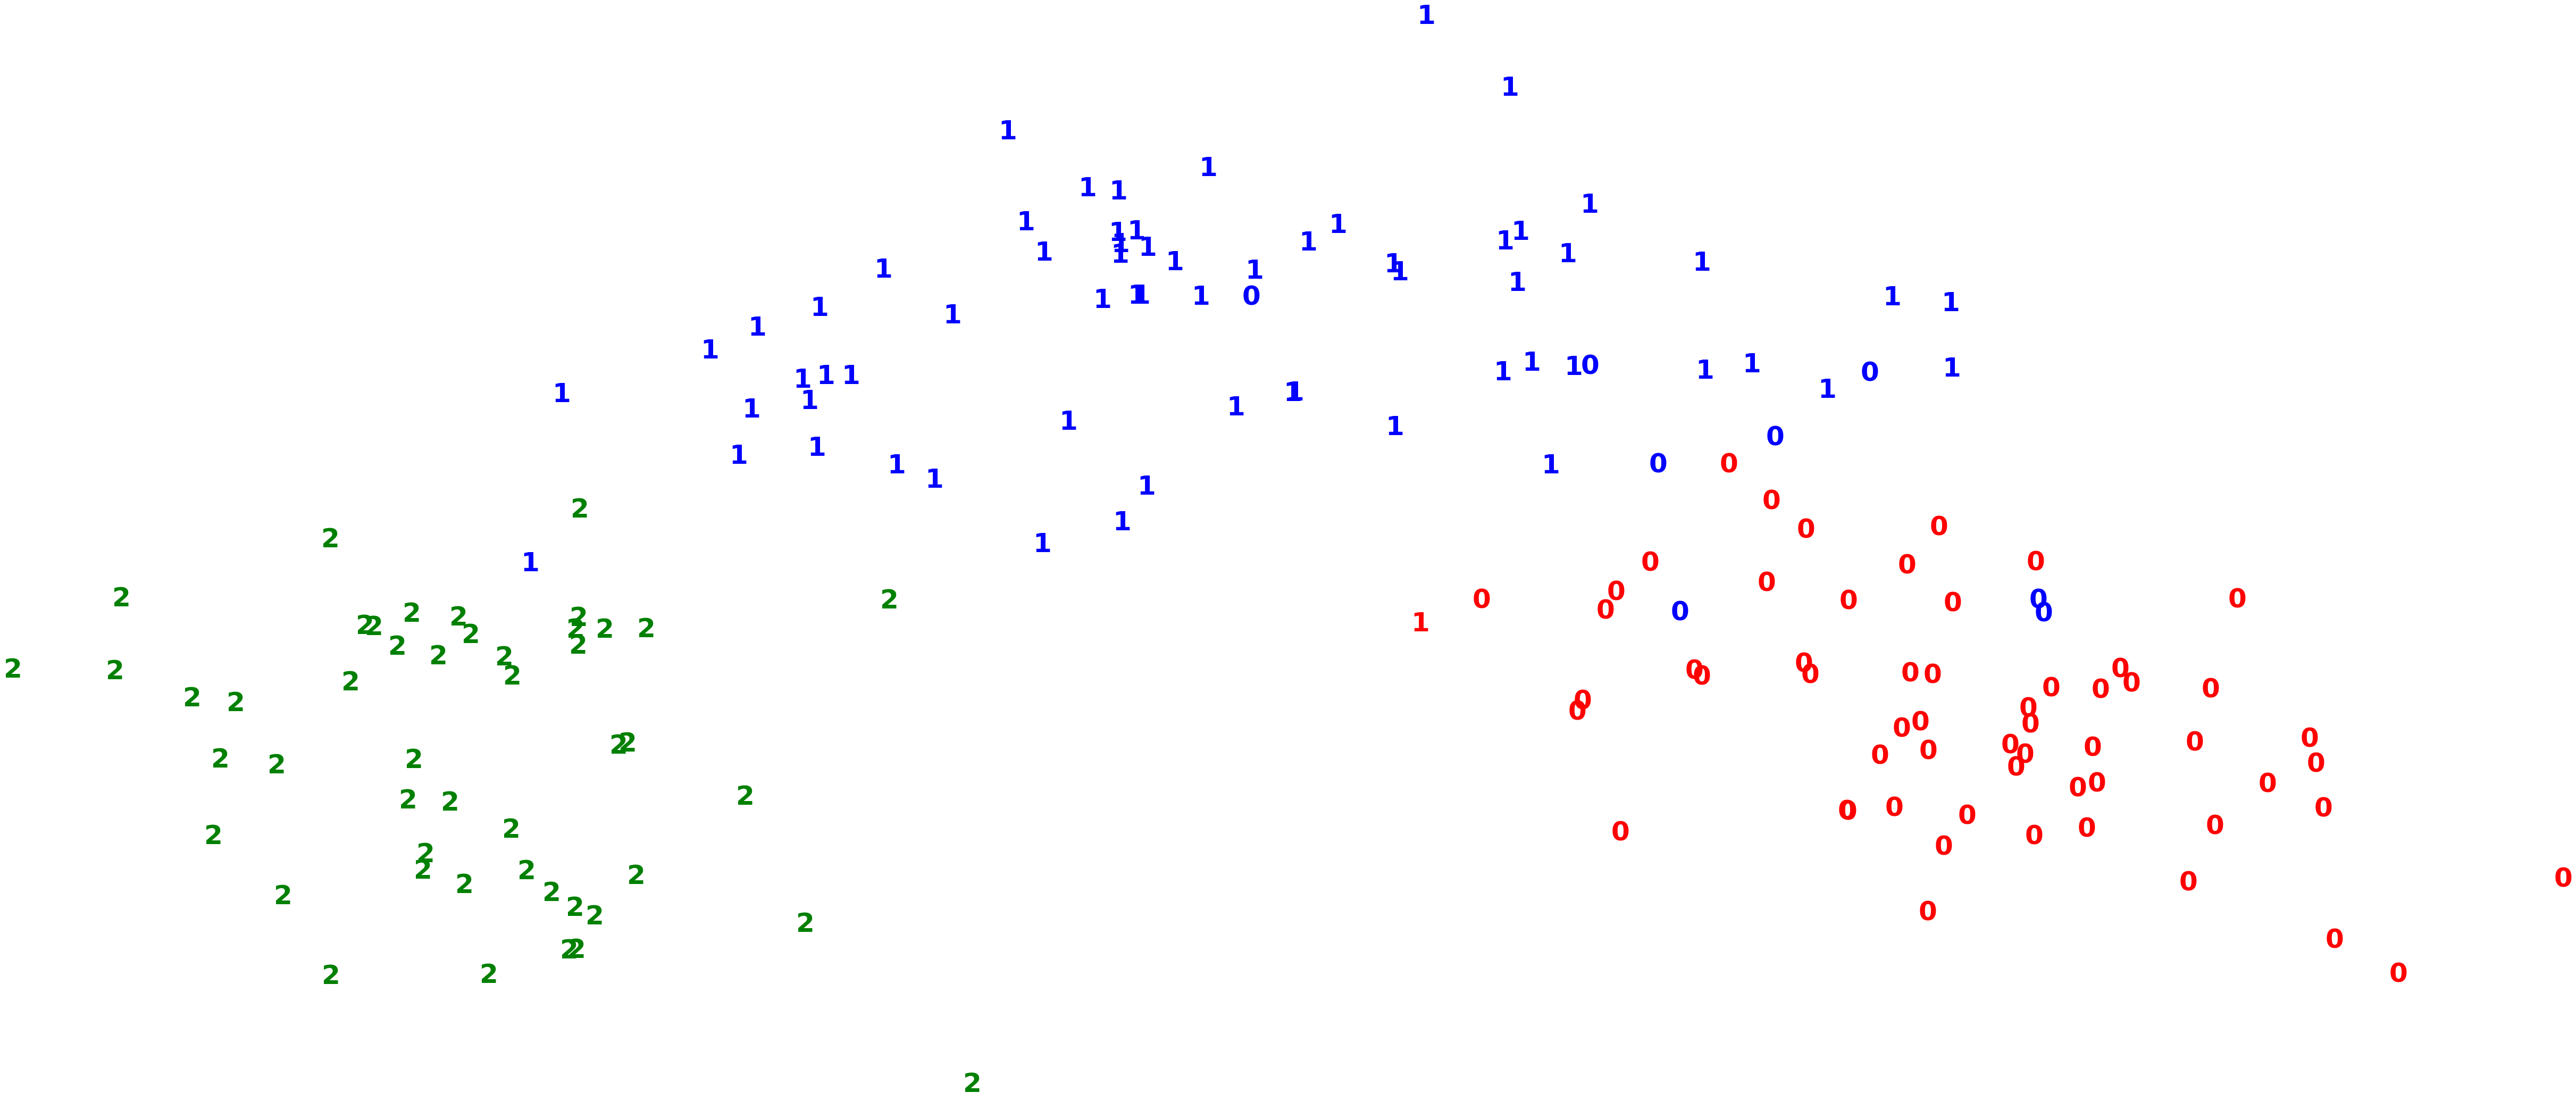

------------------------------------------------------
col_0   0   1   2
row_0            
0      58   1   0
1       8  63   0
2       0   0  48
ARI score with covariance_type=full: 0.8452681277002906
Silhouette score with covariance_type=full: 0.2691288473033129
------------------------------------------------------


In [48]:
# covariance_type = full
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="full")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Get predicted clusters.
full_pred = GaussianMixture(n_components=3, random_state=123, covariance_type="full").fit_predict(X_std)
print("------------------------------------------------------")
print(pd.crosstab(y, full_pred))

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

### covariance_type = tied

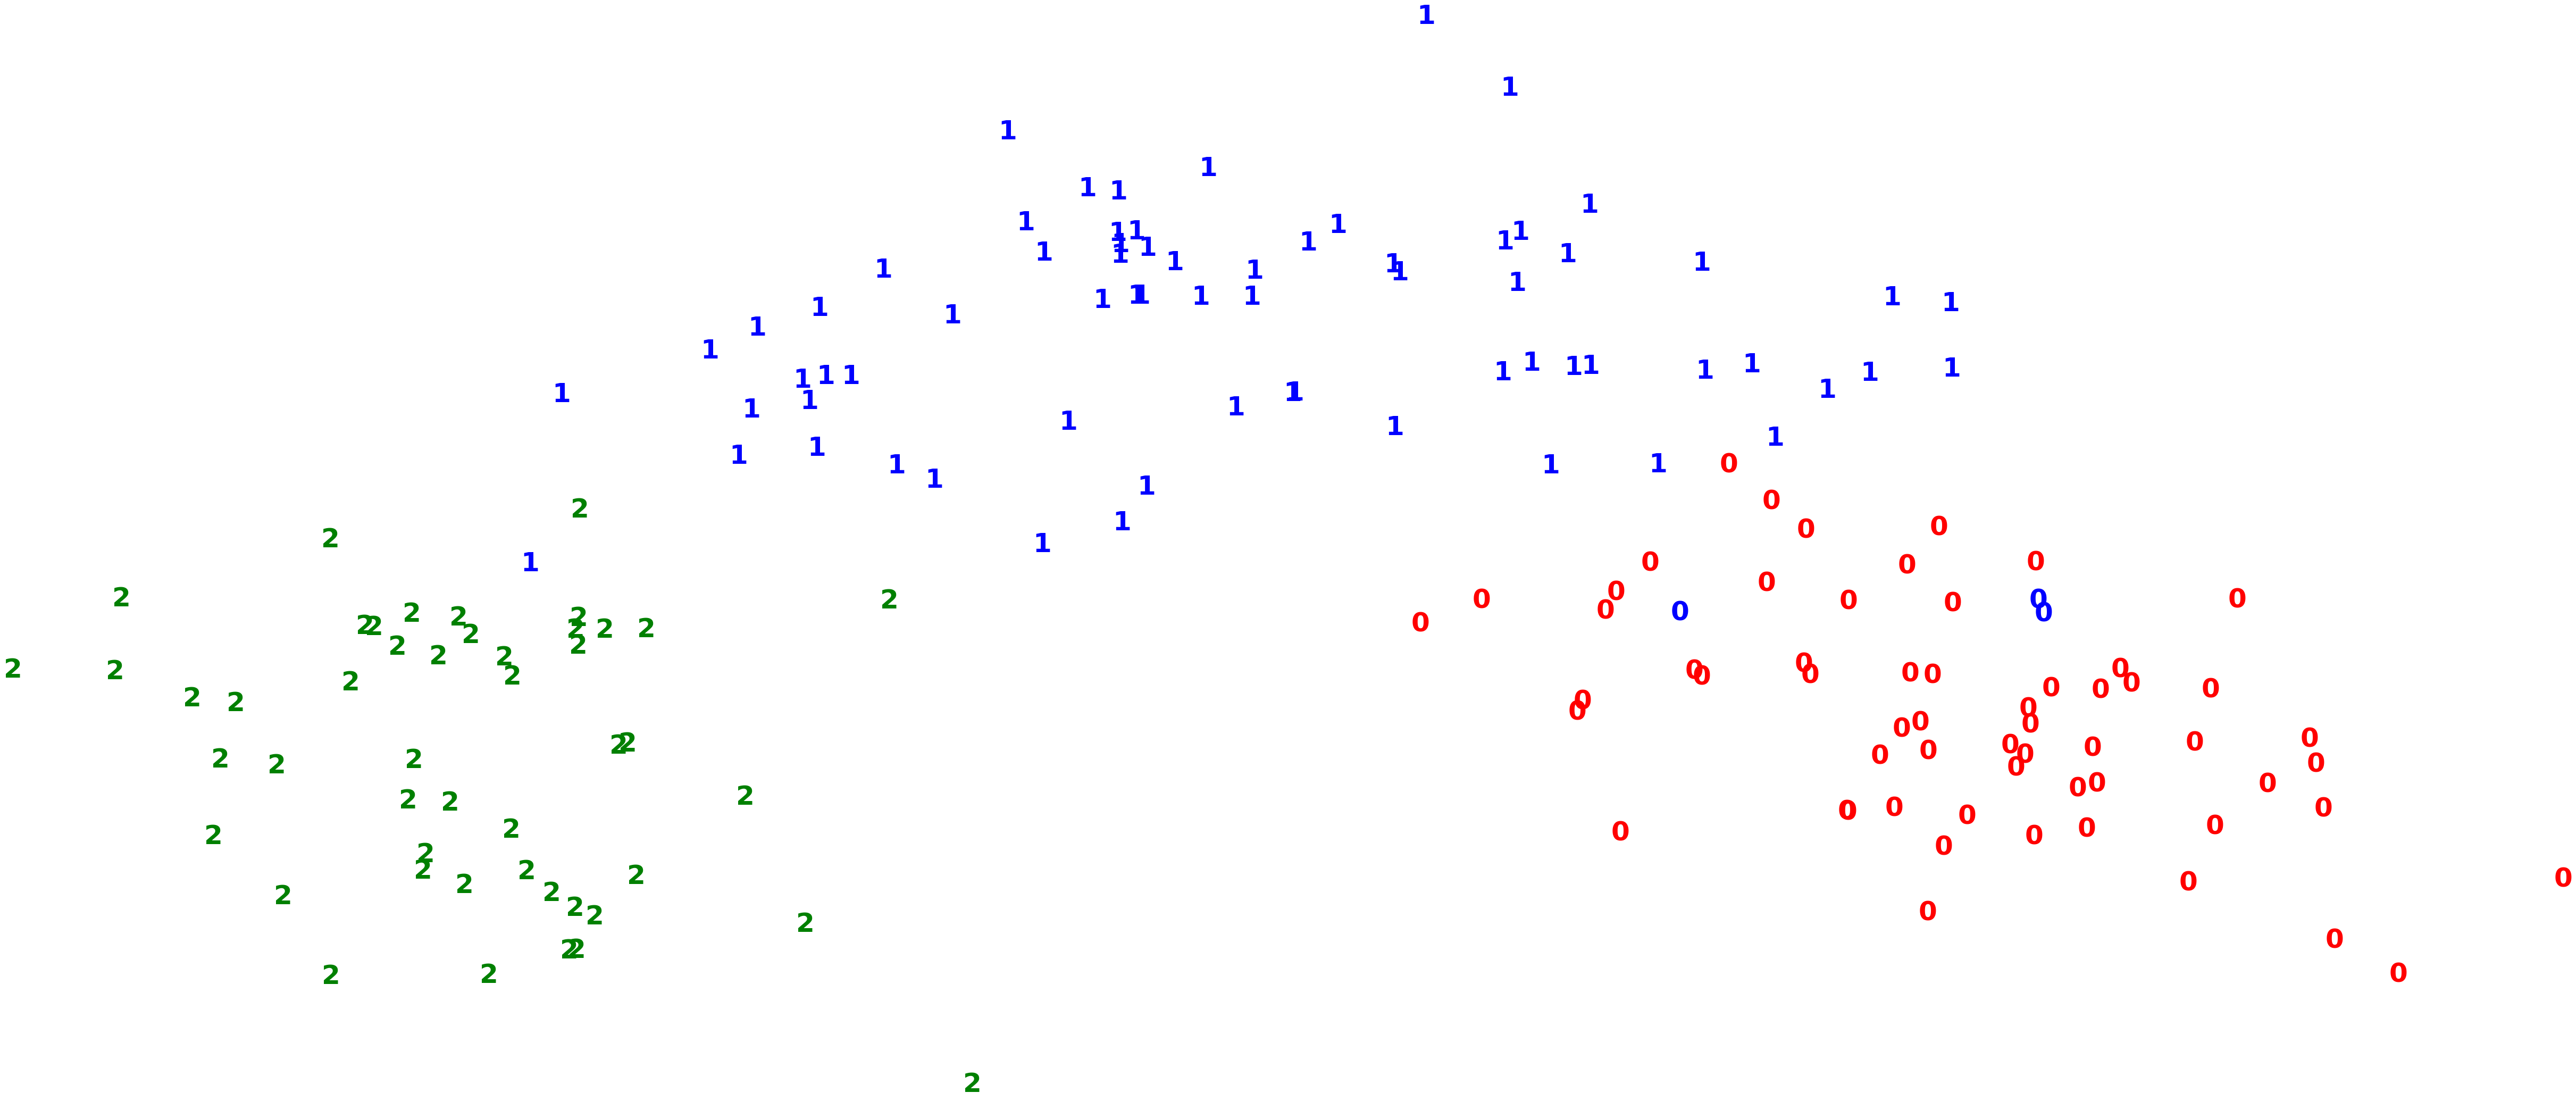

------------------------------------------------------
col_0   0   1   2
row_0            
0      59   0   0
1       3  68   0
2       0   0  48
ARI score with covariance_type=tied: 0.9458850914799445
Silhouette score with covariance_type=tied: 0.28144098734264056
------------------------------------------------------


In [49]:
# covariance_type = tied
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="tied")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Get predicted clusters.
tied_pred = GaussianMixture(n_components=3, random_state=123, covariance_type="tied").fit_predict(X_std)
print("------------------------------------------------------")
print(pd.crosstab(y, tied_pred))

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

### covariance_type = diag

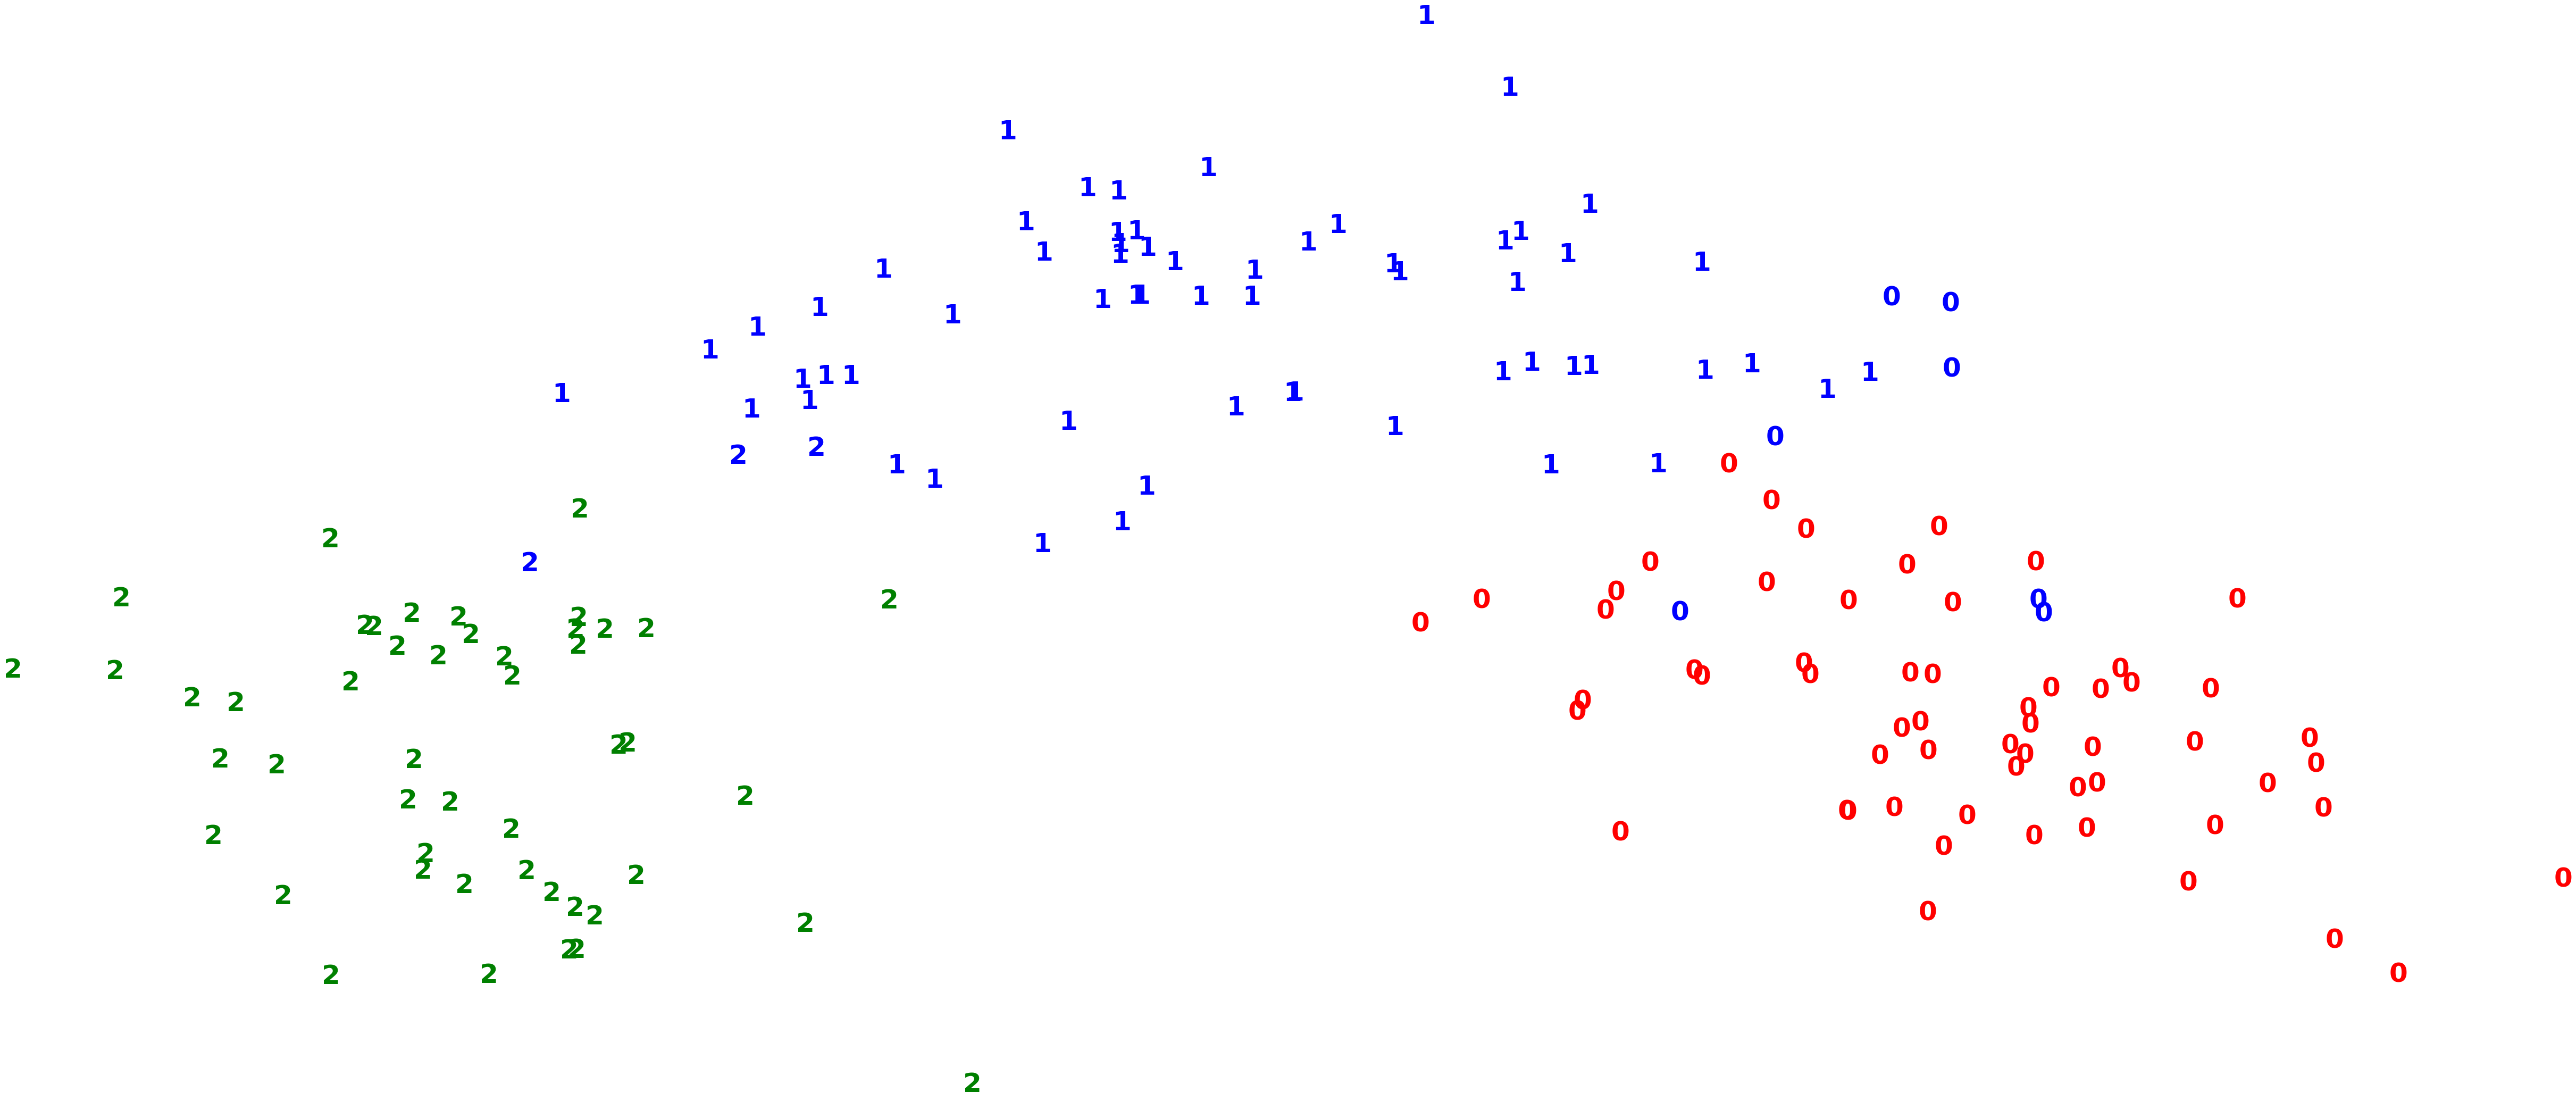

------------------------------------------------------
col_0   0   1   2
row_0            
0      59   0   0
1       7  61   3
2       0   0  48
ARI score with covariance_type=diag: 0.8308979266346822
Silhouette score with covariance_type=diag: 0.2792478244547092
------------------------------------------------------


In [50]:
# covariance_type = diag
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="diag")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Get predicted clusters.
diag_pred = GaussianMixture(n_components=3, random_state=123, covariance_type="diag").fit_predict(X_std)
print("------------------------------------------------------")
print(pd.crosstab(y, diag_pred))

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

### covariance_type = spherical

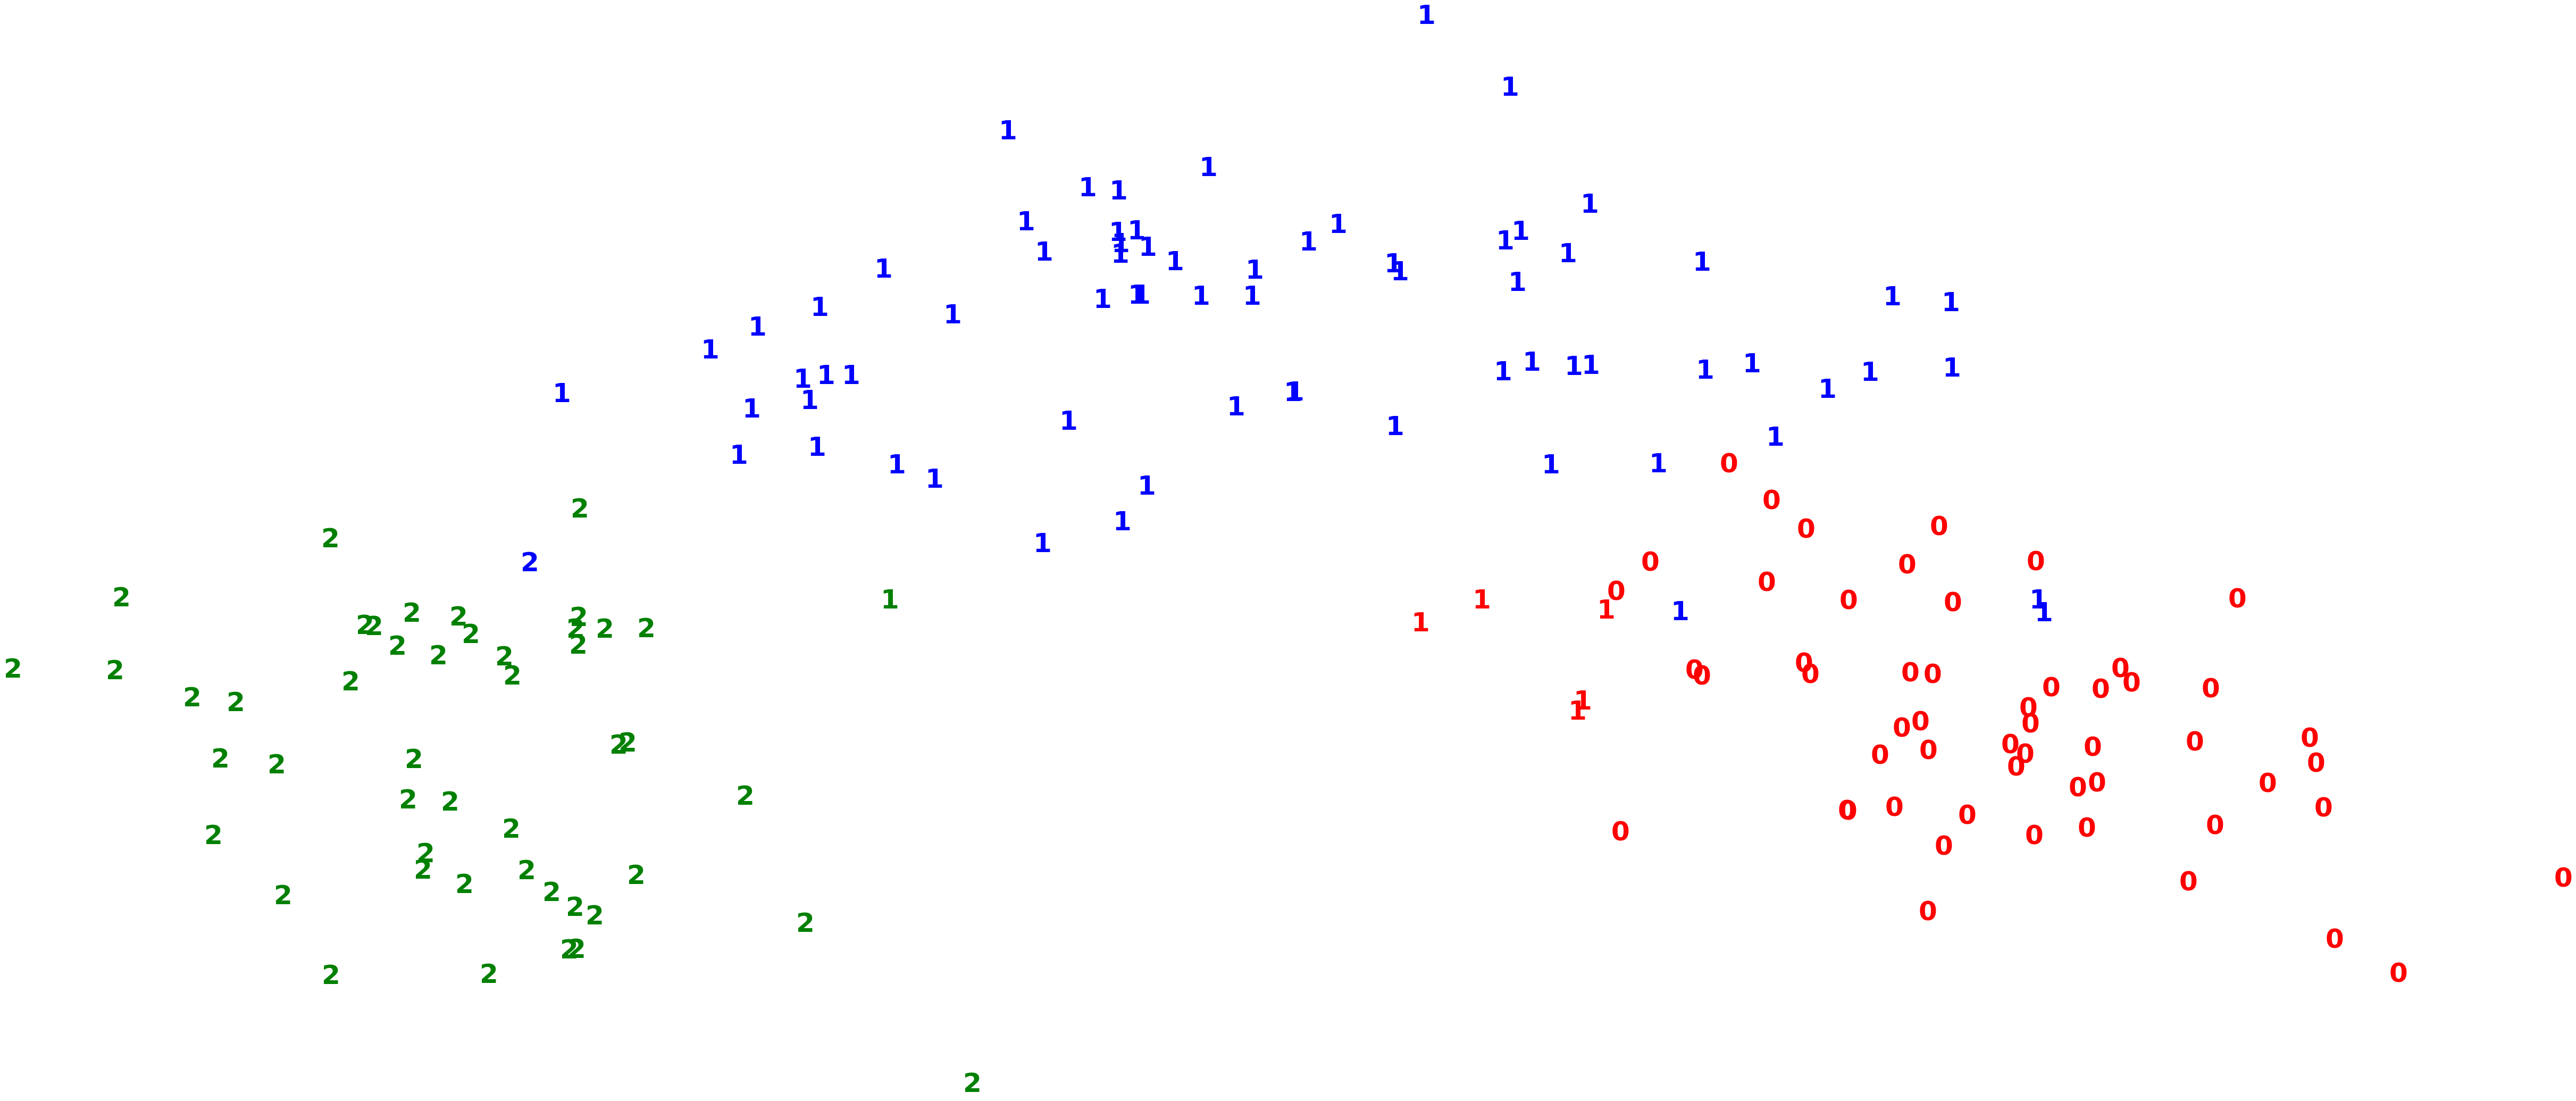

------------------------------------------------------
col_0   0   1   2
row_0            
0      54   5   0
1       0  70   1
2       0   1  47
ARI score with covariance_type=spherical: 0.8786186373167587
Silhouette score with covariance_type=spherical: 0.2719150996882052
------------------------------------------------------


In [51]:
# covariance_type = spherical
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="spherical")

# Fit model
clusters = gmm_cluster.fit_predict(X_std)


pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Get predicted clusters.
spherical_pred = GaussianMixture(n_components=3, random_state=123, covariance_type="spherical").fit_predict(X_std)
print("------------------------------------------------------")
print(pd.crosstab(y, spherical_pred))

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

# Summary of Clustering


__K means:__
   - Wrong clusters: 6 points
   - Adjusted Rand Index: 0.90
   - The silhoutte score: 0.28
   
__Agglomerative clustering(Complete linkage)__
   - Wrong clusters: 27 points
   - Adjusted Rand Index: 0.60
   - The silhoutte score: 0.24
   
__Agglomerative clustering(Average linkage)__
   - Wrong clusters: 13 points
   - Adjusted Rand Index: 0.78
   - The silhoutte score: 0.26
   
__Agglomerative clustering(Ward linkage)__
   - Wrong clusters: 13 points
   - Adjusted Rand Index: 0.78
   - The silhoutte score: 0.26

__DBSCAN__ : it is hard to find paremeters.

__GLM(covariance_type=full)__
   - Wrong clusters: 9 points
   - Adjusted Rand Index: 0.85
   - The silhoutte score: 0.27

__GLM(covariance_type=tied)__
   - Wrong clusters: 3 points
   - Adjusted Rand Index: 0.85
   - The silhoutte score: 0.28

__GLM(covariance_type=diag)__
   - Wrong clusters: 10 points
   - Adjusted Rand Index: 0.95
   - The silhoutte score: 0.28

__GLM(covariance_type=spherical)__
   - Wrong clusters: 7 points
   - Adjusted Rand Index: 0.88
   - The silhoutte score: 0.27



___Based on the results above, GLM works best for this data set, especially, when we use tied type of covariance.___